In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [ ]:
# Read data from a CSV file into a DataFrame
df = pd.read_csv('witcher_network.csv')
df.head()

,Unnamed: 0,Source,Target,Type,Weight,book
0,0,Velerad,Geralt,Undirected,1,1
1,1,Geralt,Foltest,Undirected,5,1
2,2,Foltest,Geralt,Undirected,4,1
3,3,Adda,Geralt,Undirected,1,1
4,4,Geralt,Ostrit,Undirected,4,1


# Pre processing

In [ ]:
# remove unuseful columns
df = df.drop(labels='Unnamed: 0', axis=1)
df = df.drop(labels='Type', axis=1)
df = df.rename(columns={'book': 'Book'})

df

,Source,Target,Weight,Book
0,Velerad,Geralt,1,1
1,Geralt,Foltest,5,1
2,Foltest,Geralt,4,1
3,Adda,Geralt,1,1
4,Geralt,Ostrit,4,1
...,...,...,...,...
2595,Lytta,Ciri,2,7
2596,Lytta,Triss,1,7
2597,Triss,Dandelion,1,7
2598,Triss,Yarpen,1,7


In [ ]:
# sort in lexicographical order Source and Target
df['Source'], df['Target'] = zip(*df.apply(lambda row: sorted([row['Source'], row['Target']]), axis=1))

# groupby: Among rows with same Source, Target and Book select the one with largest weight
df_proc = df.groupby(['Source', 'Target', 'Book']).agg({'Weight': 'sum'}).reset_index()

In [ ]:
# save dataframe in csv
# df_proc.to_csv('df_grouped.csv', index=False)
#print(df_proc.shape)
#print(df.shape)

In [ ]:
df_proc

,Source,Target,Book,Weight
0,Adalia,Anna,5,1
1,Adalia,Assire,5,4
2,Adalia,Calanthe,5,1
3,Adalia,Francesca,5,1
4,Adalia,Margarita,5,1
...,...,...,...,...
1765,Yarpen,Yennefer,3,1
1766,Yarpen,Yennefer,4,2
1767,Yarpen,Zoltan,7,13
1768,Yennefer,Yurga,2,2


# Graph creation

Creating the graphs for all 7 books

In [ ]:
# subgraphs for all 7 books

df_book1 = df_proc[df_proc['Book']==1]
df_book2 = df_proc[df_proc['Book']==2]
df_book3 = df_proc[df_proc['Book']==3]
df_book4 = df_proc[df_proc['Book']==4]
df_book5 = df_proc[df_proc['Book']==5]
df_book6 = df_proc[df_proc['Book']==6]
df_book7 = df_proc[df_proc['Book']==7]


In [ ]:
# Create a graph from the dataframe
G_1 = nx.from_pandas_edgelist(df_book1, 'Source', 'Target', edge_attr=True)
G_2 = nx.from_pandas_edgelist(df_book2, 'Source', 'Target', edge_attr=True)
G_3 = nx.from_pandas_edgelist(df_book3, 'Source', 'Target', edge_attr=True)
G_4 = nx.from_pandas_edgelist(df_book4, 'Source', 'Target', edge_attr=True)
G_5 = nx.from_pandas_edgelist(df_book5, 'Source', 'Target', edge_attr=True)
G_6 = nx.from_pandas_edgelist(df_book6, 'Source', 'Target', edge_attr=True)
G_7 = nx.from_pandas_edgelist(df_book7, 'Source', 'Target', edge_attr=True)

# create a graph for all books
G_all = nx.from_pandas_edgelist(df_proc, 'Source', 'Target', edge_attr=True)


Dataframes for nodes and edges + save as csv files -> used for Gephi visualization

In [ ]:
# Create a DataFrame for nodes
df_nodes1 = pd.DataFrame(G_1.nodes(), columns=['Nodes'])
df_nodes2 = pd.DataFrame(G_2.nodes(), columns=['Nodes'])
df_nodes3 = pd.DataFrame(G_3.nodes(), columns=['Nodes'])
df_nodes4 = pd.DataFrame(G_4.nodes(), columns=['Nodes'])
df_nodes5 = pd.DataFrame(G_5.nodes(), columns=['Nodes'])
df_nodes6 = pd.DataFrame(G_6.nodes(), columns=['Nodes'])
df_nodes7 = pd.DataFrame(G_7.nodes(), columns=['Nodes'])
df_nodes_all = pd.DataFrame(G_all.nodes(), columns=['Nodes'])

# print("Nodes of graph G_1:")
# print(df_nodes1)

In [ ]:
# Create a DataFrame for edges
df_edges1 = pd.DataFrame(list(G_1.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges2 = pd.DataFrame(list(G_2.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges3 = pd.DataFrame(list(G_3.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges4 = pd.DataFrame(list(G_4.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges5 = pd.DataFrame(list(G_5.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges6 = pd.DataFrame(list(G_6.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges7 = pd.DataFrame(list(G_7.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges_all = pd.DataFrame(list(G_all.edges(data=True)), columns=['Source', 'Target', 'Attributes'])

# print("Edges of graph G_1:")
# print(df_edges1)


In [ ]:
df_edges1.head()

,Source,Target,Attributes
0,Adda,Foltest,"{'Book': 1, 'Weight': 1}"
1,Adda,Geralt,"{'Book': 1, 'Weight': 3}"
2,Foltest,Geralt,"{'Book': 1, 'Weight': 9}"
3,Foltest,Ostrit,"{'Book': 1, 'Weight': 1}"
4,Foltest,Two,"{'Book': 1, 'Weight': 1}"


In [ ]:
# Creation of column "Book" and "Weight" -> (apply a lambda function to the "Attributes" column)
df_edges1[['Book', 'Weight']] = df_edges1['Attributes'].apply(lambda x: pd.Series([x['Book'], x['Weight']]))
df_edges2[['Book', 'Weight']] = df_edges2['Attributes'].apply(lambda x: pd.Series([x['Book'], x['Weight']]))
df_edges3[['Book', 'Weight']] = df_edges3['Attributes'].apply(lambda x: pd.Series([x['Book'], x['Weight']]))
df_edges4[['Book', 'Weight']] = df_edges4['Attributes'].apply(lambda x: pd.Series([x['Book'], x['Weight']]))
df_edges5[['Book', 'Weight']] = df_edges5['Attributes'].apply(lambda x: pd.Series([x['Book'], x['Weight']]))
df_edges6[['Book', 'Weight']] = df_edges6['Attributes'].apply(lambda x: pd.Series([x['Book'], x['Weight']]))
df_edges7[['Book', 'Weight']] = df_edges7['Attributes'].apply(lambda x: pd.Series([x['Book'], x['Weight']]))
df_edges_all[['Book', 'Weight']] = df_edges_all['Attributes'].apply(lambda x: pd.Series([x['Book'], x['Weight']]))

# Drop of the "Attributes" column
df_edges1.drop('Attributes', axis=1, inplace=True)
df_edges2.drop('Attributes', axis=1, inplace=True)
df_edges3.drop('Attributes', axis=1, inplace=True)
df_edges4.drop('Attributes', axis=1, inplace=True)
df_edges5.drop('Attributes', axis=1, inplace=True)
df_edges6.drop('Attributes', axis=1, inplace=True)
df_edges7.drop('Attributes', axis=1, inplace=True)
df_edges_all.drop('Attributes', axis = 1, inplace = True)

In [ ]:
df_edges1.head()

,Source,Target,Book,Weight
0,Adda,Foltest,1,1
1,Adda,Geralt,1,3
2,Foltest,Geralt,1,9
3,Foltest,Ostrit,1,1
4,Foltest,Two,1,1


Download of the edges and nodes dataframes

In [ ]:
!mkdir nodes_gephi
!mkdir edges_gephi

In [ ]:
# Save nodes DataFrame to a CSV file
df_nodes1.to_csv('nodes_gephi/nodes_book1.csv', index=False)
df_nodes2.to_csv('nodes_gephi/nodes_book2.csv', index=False)
df_nodes3.to_csv('nodes_gephi/nodes_book3.csv', index=False)
df_nodes4.to_csv('nodes_gephi/nodes_book4.csv', index=False)
df_nodes5.to_csv('nodes_gephi/nodes_book5.csv', index=False)
df_nodes6.to_csv('nodes_gephi/nodes_book6.csv', index=False)
df_nodes7.to_csv('nodes_gephi/nodes_book7.csv', index=False)
df_nodes_all.to_csv('nodes_gephi/nodes_all.csv', index=False)


# Save edges DataFrame to a CSV file
df_edges1.to_csv('edges_gephi/edges_book1.csv', index=False)
df_edges2.to_csv('edges_gephi/edges_book2.csv', index=False)
df_edges3.to_csv('edges_gephi/edges_book3.csv', index=False)
df_edges4.to_csv('edges_gephi/edges_book4.csv', index=False)
df_edges5.to_csv('edges_gephi/edges_book5.csv', index=False)
df_edges6.to_csv('edges_gephi/edges_book6.csv', index=False)
df_edges7.to_csv('edges_gephi/edges_book7.csv', index=False)
df_edges_all.to_csv('edges_gephi/edges_all.csv', index=False)

In [ ]:
!zip -r /content/edges_gephi.zip /content/edges_gephi
!zip -r /content/nodes_gephi.zip /content/nodes_gephi

  adding: content/edges_gephi/ (stored 0%)
  adding: content/edges_gephi/edges_book5.csv (deflated 75%)
  adding: content/edges_gephi/edges_all.csv (deflated 74%)
  adding: content/edges_gephi/edges_book1.csv (deflated 72%)
  adding: content/edges_gephi/edges_book7.csv (deflated 75%)
  adding: content/edges_gephi/edges_book3.csv (deflated 73%)
  adding: content/edges_gephi/edges_book6.csv (deflated 72%)
  adding: content/edges_gephi/edges_book4.csv (deflated 75%)
  adding: content/edges_gephi/edges_book2.csv (deflated 69%)
  adding: content/nodes_gephi/ (stored 0%)
  adding: content/nodes_gephi/nodes_book6.csv (deflated 34%)
  adding: content/nodes_gephi/nodes_book2.csv (deflated 25%)
  adding: content/nodes_gephi/nodes_all.csv (deflated 39%)
  adding: content/nodes_gephi/nodes_book7.csv (deflated 37%)
  adding: content/nodes_gephi/nodes_book5.csv (deflated 35%)
  adding: content/nodes_gephi/nodes_book1.csv (deflated 34%)
  adding: content/nodes_gephi/nodes_book4.csv (deflated 36%)
  a

In [ ]:
# from google.colab import files
# files.download("/content/edges_gephi.zip")
# files.download("/content/nodes_gephi.zip")

# Measures

## Degree Centrality

Number of edges connected to a node

In [ ]:
#compute degree centrality
degree_1 = nx.degree_centrality(G_1)
degree_2 = nx.degree_centrality(G_2)
degree_3 = nx.degree_centrality(G_3)
degree_4 = nx.degree_centrality(G_4)
degree_5 = nx.degree_centrality(G_5)
degree_6 = nx.degree_centrality(G_6)
degree_7 = nx.degree_centrality(G_7)
degree_all = nx.degree_centrality(G_all)

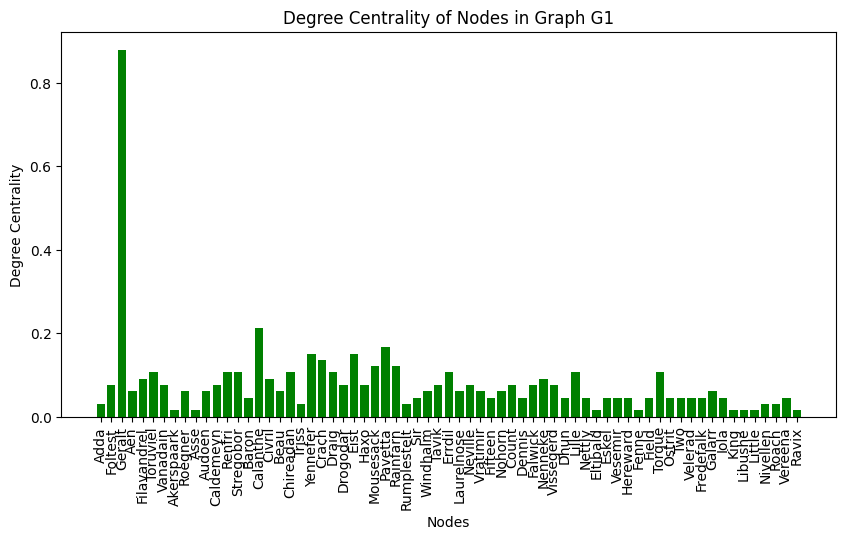

In [ ]:
# show the histogram of degree centrality values for each node

# book1
degree_nodes_1 = degree_1.keys()
degree_centralities_1 = degree_1.values()

plt.figure(figsize=(10,5))
plt.bar(degree_nodes_1, degree_centralities_1, color='g')
plt.xlabel('Nodes')
plt.ylabel('Degree Centrality')
plt.title('Degree Centrality of Nodes in Graph G1')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# # BOOK2
# degree_nodes_2 = degree_2.keys()
# degree_centralities_2 = degree_2.values()

# plt.figure(figsize=(10,5))
# plt.bar(degree_nodes_2, degree_centralities_2, color='g')
# plt.xlabel('Nodes')
# plt.ylabel('Degree Centrality')
# plt.title('Degree Centrality of Nodes in Graph G2')
# plt.xticks(rotation=90)
# plt.show()


# # BOOK3
# degree_nodes_3 = degree_3.keys()
# degree_centralities_3= degree_3.values()

# plt.figure(figsize=(10,5))
# plt.bar(degree_nodes_3, degree_centralities_3, color='g')
# plt.xlabel('Nodes')
# plt.ylabel('Degree Centrality')
# plt.title('Degree Centrality of Nodes in Graph G3')
# plt.xticks(rotation=90)
# plt.show()



# # BOOK4
# degree_nodes_4 = degree_4.keys()
# degree_centralities_4= degree_4.values()

# plt.figure(figsize=(10,5))
# plt.bar(degree_nodes_4, degree_centralities_4, color='g')
# plt.xlabel('Nodes')
# plt.ylabel('Degree Centrality')
# plt.title('Degree Centrality of Nodes in Graph G4')
# plt.xticks(rotation=90)
# plt.show()


# # BOOK5
# degree_nodes_5 = degree_5.keys()
# degree_centralities_5= degree_5.values()

# plt.figure(figsize=(10,5))
# plt.bar(degree_nodes_5, degree_centralities_5, color='g')
# plt.xlabel('Nodes')
# plt.ylabel('Degree Centrality')
# plt.title('Degree Centrality of Nodes in Graph G5')
# plt.xticks(rotation=90)
# plt.show()


# # BOOK6
# degree_nodes_6 = degree_6.keys()
# degree_centralities_6 = degree_6.values()

# plt.figure(figsize=(10,5))
# plt.bar(degree_nodes_6, degree_centralities_6, color='g')
# plt.xlabel('Nodes')
# plt.ylabel('Degree Centrality')
# plt.title('Degree Centrality of Nodes in Graph G6')
# plt.xticks(rotation=90)
# plt.show()

# # BOOK7
# degree_nodes_7 = degree_7.keys()
# degree_centralities_7= degree_7.values()

# plt.figure(figsize=(10,5))
# plt.bar(degree_nodes_7, degree_centralities_7, color='g')
# plt.xlabel('Nodes')
# plt.ylabel('Degree Centrality')
# plt.title('Degree Centrality of Nodes in Graph G7')
# plt.xticks(rotation=90)
# plt.show()


#ALL BOOKS
# degree_nodes_all = degree_all.keys()
# degree_centralities_all = degree_all.values()

# plt.figure(figsize=(10,5))
# plt.bar(degree_nodes_all, degree_centralities_all, color='g')
# plt.xlabel('Nodes')
# plt.ylabel('Degree Centrality')
# plt.title('Degree Centrality of Nodes in the whole graph')
# plt.xticks(rotation=90)
# plt.show()

In [ ]:
# Find nodes with degree centrality above a certain threshold: they are the most important nodes (with more edges)
threshold = 0.2 # we have to choose a value

high_degree_nodes_1 = [node for node, deg in degree_1.items() if deg > threshold]
high_degree_nodes_2 = [node for node, deg in degree_2.items() if deg > threshold]
high_degree_nodes_3 = [node for node, deg in degree_3.items() if deg > threshold]
high_degree_nodes_4 = [node for node, deg in degree_4.items() if deg > threshold]
high_degree_nodes_5 = [node for node, deg in degree_5.items() if deg > threshold]
high_degree_nodes_6 = [node for node, deg in degree_6.items() if deg > threshold]
high_degree_nodes_7 = [node for node, deg in degree_7.items() if deg > threshold]
high_degree_nodes_all = [node for node, deg in degree_all.items() if deg > threshold]

print("Graph 1 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_1)
print("Graph 2 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_2)
print("Graph 3 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_3)
print("Graph 4 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_4)
print("Graph 5 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_5)
print("Graph 6 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_6)
print("Graph 7 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_7)
print("Whole Graph - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_all)


Graph 1 - Nodes with degree centrality above  0.2 :  ['Geralt', 'Calanthe']
Graph 2 - Nodes with degree centrality above  0.2 :  ['Braenn', 'Geralt', 'Dandelion', 'Ciri', 'Yurga']
Graph 3 - Nodes with degree centrality above  0.2 :  ['Ciri', 'Yennefer', 'Dandelion', 'Geralt', 'Calanthe', 'Foltest', 'King', 'Rience', 'Triss']
Graph 4 - Nodes with degree centrality above  0.2 :  ['Ciri', 'Codringher', 'Emhyr', 'Geralt', 'Yennefer', 'Gar', 'Philippa', 'Tissaia', 'Vilgefortz', 'Sabrina']
Graph 5 - Nodes with degree centrality above  0.2 :  ['Assire', 'Francesca', 'Sabrina', 'Yennefer', 'Dandelion', 'Fringilla', 'Geralt', 'Ida', 'Milva', 'Philippa', 'Ciri', 'Cahir', 'Emhyr', 'Zoltan']
Graph 6 - Nodes with degree centrality above  0.2 :  ['Ciri', 'Geralt', 'Baron', 'Emhyr']
Graph 7 - Nodes with degree centrality above  0.2 :  ['Ciri', 'King', 'Yennefer', 'Dandelion', 'Geralt', 'Emhyr']
Whole Graph - Nodes with degree centrality above  0.2 :  ['Yennefer', 'Ciri', 'Geralt', 'Dandelion', 'Emhyr

#### Degree centrality ***distribution***



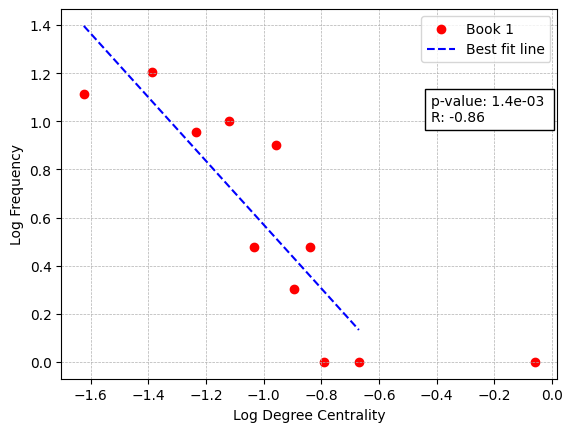

The slope of the line is: -1.3247535339398941


In [ ]:
# BOOK 1

values_1 = list(degree_1.values())
freq, bins = np.histogram(values_1, bins=50)

# Calculate bin centers
x = (bins[:-1] + bins[1:]) / 2  # x = center value of each bin
y = freq  # y = occurrence

# Filter out zero values (they are values it added, not ours)
non_zero_indices = np.where(y > 0)
x_display = x[non_zero_indices]
y_display = y[non_zero_indices]

# Exclude the last value for the fit -> namely Geralt since it's an outlier
fit_points = np.where(x_display < np.max(x_display))
x_fit = x_display[fit_points]
y_fit = y_display[fit_points]

# Take the logarithm of x and y
log_x_display = np.log10(x_display)
log_y_display = np.log10(y_display)
log_x_fit = np.log10(x_fit)
log_y_fit = np.log10(y_fit)

# Fit a straight line to the data
coeffs = np.polyfit(log_x_fit, log_y_fit, 1)

# Generate y-values for the fitted line
fitted_y = coeffs[0] * log_x_fit + coeffs[1]

# Perform linear regression and get p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(log_x_fit, log_y_fit) # r_value -> is the pearson correlation coefficient
                                                                                     # p_value -> degree of confidence in rejecting the null hypothesis (the lower the better)
plt.scatter(log_x_display, log_y_display, color='r', label='Book 1')
plt.plot(log_x_fit, fitted_y, 'b--', label='Best fit line')  # Plot fitted line
plt.legend()
plt.xlabel('Log Degree Centrality')
plt.ylabel('Log Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.text(-0.42, 1, f'p-value: {p_value:.1e} \nR: {r_value: .2f}', bbox=dict(facecolor='white')) # Add p-value to the plot at the upper right corner

plt.show()

print(f"The slope of the line is: {slope}")

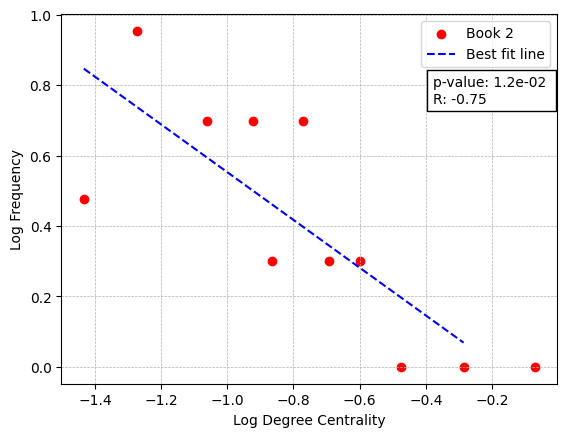

The slope of the line is: -0.6782442374655144


In [ ]:
# BOOK 2

# FIT OF THE DEGREE CENTRALITY DISTRIBUTION WITH LOG VALUES
values_2 = list(degree_2.values())
freq, bins = np.histogram(values_2, bins=50)

# Calculate bin centers
x = (bins[:-1] + bins[1:]) / 2  # x = center value of each bin
y = freq  # y = occurrence

# Filter out zero values (they are values it added, not ours)
non_zero_indices = np.where(y > 0)
x_display = x[non_zero_indices]
y_display = y[non_zero_indices]

# Exclude the last value for the fit
fit_points = np.where(x_display < np.max(x_display))
x_fit = x_display[fit_points]
y_fit = y_display[fit_points]

# Take the logarithm of x and y
log_x_display = np.log10(x_display)
log_y_display = np.log10(y_display)
log_x_fit = np.log10(x_fit)
log_y_fit = np.log10(y_fit)

# Fit a straight line to the data
coeffs = np.polyfit(log_x_fit, log_y_fit, 1)

# Generate y-values for the fitted line
fitted_y = coeffs[0] * log_x_fit + coeffs[1]

# Perform linear regression and get p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(log_x_fit, log_y_fit) # r_value -> is the pearson correlation coefficient
                                                                                     # p_value -> degree of confidence in rejecting the null hypothesis (the lower the better)
plt.scatter(log_x_display, log_y_display, color='r', label='Book 2')
plt.plot(log_x_fit, fitted_y, 'b--', label='Best fit line')  # Plot fitted line
plt.legend()
plt.xlabel('Log Degree Centrality')
plt.ylabel('Log Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.text(-0.38, 0.75, f'p-value: {p_value:.1e} \nR: {r_value: .2f}', bbox=dict(facecolor='white')) # Add p-value to the plot at the upper right corner

plt.show()

print(f"The slope of the line is: {slope}")

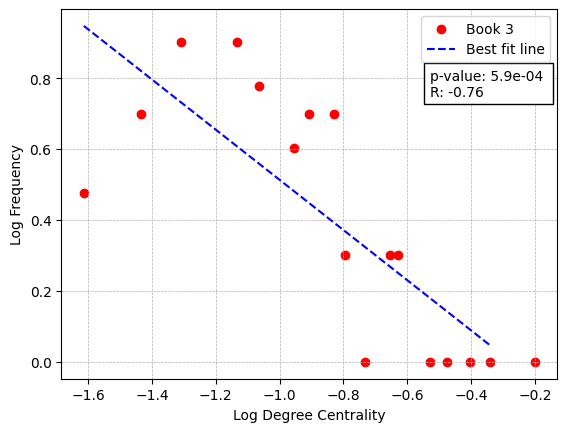

The slope of the line is: -0.7074924985387276


In [ ]:
# BOOK 3

# FIT OF THE DEGREE CENTRALITY DISTRIBUTION WITH LOG VALUES
values_3 = list(degree_3.values())
freq, bins = np.histogram(values_3, bins=50)

# Calculate bin centers
x = (bins[:-1] + bins[1:]) / 2  # x = center value of each bin
y = freq  # y = occurrence

# Filter out zero values (they are values it added, not ours)
non_zero_indices = np.where(y > 0)
x_display = x[non_zero_indices]
y_display = y[non_zero_indices]

# Exclude the last value for the fit
fit_points = np.where(x_display < np.max(x_display))
x_fit = x_display[fit_points]
y_fit = y_display[fit_points]

# Take the logarithm of x and y
log_x_display = np.log10(x_display)
log_y_display = np.log10(y_display)
log_x_fit = np.log10(x_fit)
log_y_fit = np.log10(y_fit)

# Fit a straight line to the data
coeffs = np.polyfit(log_x_fit, log_y_fit, 1)

# Generate y-values for the fitted line
fitted_y = coeffs[0] * log_x_fit + coeffs[1]

# Perform linear regression and get p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(log_x_fit, log_y_fit) # r_value -> is the pearson correlation coefficient
                                                                                     # p_value -> degree of confidence in rejecting the null hypothesis (the lower the better)
plt.scatter(log_x_display, log_y_display, color='r', label='Book 3')
plt.plot(log_x_fit, fitted_y, 'b--', label='Best fit line')  # Plot fitted line
plt.legend()
plt.xlabel('Log Degree Centrality')
plt.ylabel('Log Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.text(-0.53, 0.75, f'p-value: {p_value:.1e} \nR: {r_value: .2f}', bbox=dict(facecolor='white')) # Add p-value to the plot at the upper right corner

plt.show()

print(f"The slope of the line is: {slope}")

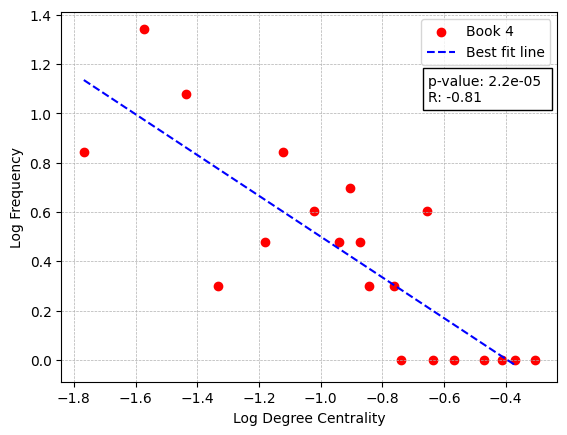

The slope of the line is: -0.826810247309156


In [ ]:
# BOOK 4

# FIT OF THE DEGREE CENTRALITY DISTRIBUTION WITH LOG VALUES
values_4 = list(degree_4.values())
freq, bins = np.histogram(values_4, bins=50)

# Calculate bin centers
x = (bins[:-1] + bins[1:]) / 2  # x = center value of each bin
y = freq  # y = occurrence

# Filter out zero values (they are values it added, not ours)
non_zero_indices = np.where(y > 0)
x_display = x[non_zero_indices]
y_display = y[non_zero_indices]

# Exclude the last value for the fit
fit_points = np.where(x_display < np.max(x_display))
x_fit = x_display[fit_points]
y_fit = y_display[fit_points]

# Take the logarithm of x and y
log_x_display = np.log10(x_display)
log_y_display = np.log10(y_display)
log_x_fit = np.log10(x_fit)
log_y_fit = np.log10(y_fit)

# Fit a straight line to the data
coeffs = np.polyfit(log_x_fit, log_y_fit, 1)

# Generate y-values for the fitted line
fitted_y = coeffs[0] * log_x_fit + coeffs[1]

# Perform linear regression and get p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(log_x_fit, log_y_fit) # r_value -> is the pearson correlation coefficient
                                                                                     # p_value -> degree of confidence in rejecting the null hypothesis (the lower the better)
plt.scatter(log_x_display, log_y_display, color='r', label='Book 4')
plt.plot(log_x_fit, fitted_y, 'b--', label='Best fit line')  # Plot fitted line
plt.legend()
plt.xlabel('Log Degree Centrality')
plt.ylabel('Log Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.text(-0.65, 1.05, f'p-value: {p_value:.1e} \nR: {r_value: .2f}', bbox=dict(facecolor='white')) # Add p-value to the plot at the upper right corner

plt.show()

print(f"The slope of the line is: {slope}")

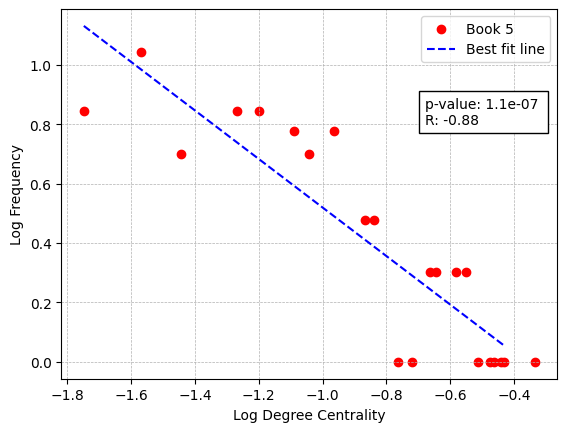

The slope of the line is: -0.816865493464208


In [ ]:
# BOOK 5

# FIT OF THE DEGREE CENTRALITY DISTRIBUTION WITH LOG VALUES
values_5 = list(degree_5.values())
freq, bins = np.histogram(values_5, bins=50)

# Calculate bin centers
x = (bins[:-1] + bins[1:]) / 2  # x = center value of each bin
y = freq  # y = occurrence

# Filter out zero values (they are values it added, not ours)
non_zero_indices = np.where(y > 0)
x_display = x[non_zero_indices]
y_display = y[non_zero_indices]

# Exclude the last value for the fit
fit_points = np.where(x_display < np.max(x_display))
x_fit = x_display[fit_points]
y_fit = y_display[fit_points]

# Take the logarithm of x and y
log_x_display = np.log10(x_display)
log_y_display = np.log10(y_display)
log_x_fit = np.log10(x_fit)
log_y_fit = np.log10(y_fit)

# Fit a straight line to the data
coeffs = np.polyfit(log_x_fit, log_y_fit, 1)

# Generate y-values for the fitted line
fitted_y = coeffs[0] * log_x_fit + coeffs[1]

# Perform linear regression and get p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(log_x_fit, log_y_fit) # r_value -> is the pearson correlation coefficient
                                                                                     # p_value -> degree of confidence in rejecting the null hypothesis (the lower the better)
plt.scatter(log_x_display, log_y_display, color='r', label='Book 5')
plt.plot(log_x_fit, fitted_y, 'b--', label='Best fit line')  # Plot fitted line
plt.legend()
plt.xlabel('Log Degree Centrality')
plt.ylabel('Log Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.text(-0.68, 0.8, f'p-value: {p_value:.1e} \nR: {r_value: .2f}', bbox=dict(facecolor='white')) # Add p-value to the plot at the upper right corner

plt.show()

print(f"The slope of the line is: {slope}")

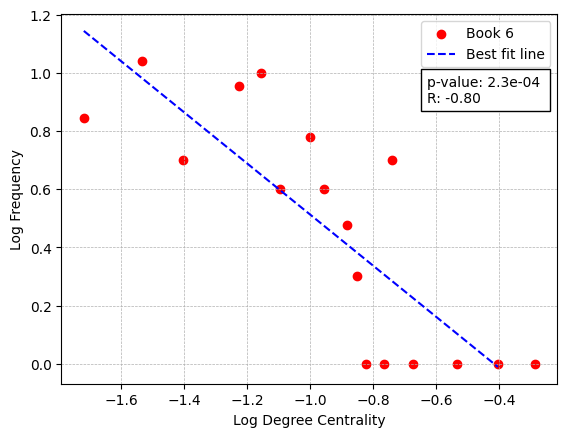

The slope of the line is: -0.8796093458044584


In [ ]:
# BOOK 6

# FIT OF THE DEGREE CENTRALITY DISTRIBUTION WITH LOG VALUES
values_6 = list(degree_6.values())
freq, bins = np.histogram(values_6, bins=50)

# Calculate bin centers
x = (bins[:-1] + bins[1:]) / 2  # x = center value of each bin
y = freq  # y = occurrence

# Filter out zero values (they are values it added, not ours)
non_zero_indices = np.where(y > 0)
x_display = x[non_zero_indices]
y_display = y[non_zero_indices]

# Exclude the last value for the fit
fit_points = np.where(x_display < np.max(x_display))
x_fit = x_display[fit_points]
y_fit = y_display[fit_points]

# Take the logarithm of x and y
log_x_display = np.log10(x_display)
log_y_display = np.log10(y_display)
log_x_fit = np.log10(x_fit)
log_y_fit = np.log10(y_fit)

# Fit a straight line to the data
coeffs = np.polyfit(log_x_fit, log_y_fit, 1)

# Generate y-values for the fitted line
fitted_y = coeffs[0] * log_x_fit + coeffs[1]

# Perform linear regression and get p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(log_x_fit, log_y_fit) # r_value -> is the pearson correlation coefficient
                                                                                     # p_value -> degree of confidence in rejecting the null hypothesis (the lower the better)
plt.scatter(log_x_display, log_y_display, color='r', label='Book 6')
plt.plot(log_x_fit, fitted_y, 'b--', label='Best fit line')  # Plot fitted line
plt.legend()
plt.xlabel('Log Degree Centrality')
plt.ylabel('Log Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.text(-0.63, 0.9, f'p-value: {p_value:.1e} \nR: {r_value: .2f}', bbox=dict(facecolor='white')) # Add p-value to the plot at the upper right corner

plt.show()

print(f"The slope of the line is: {slope}")

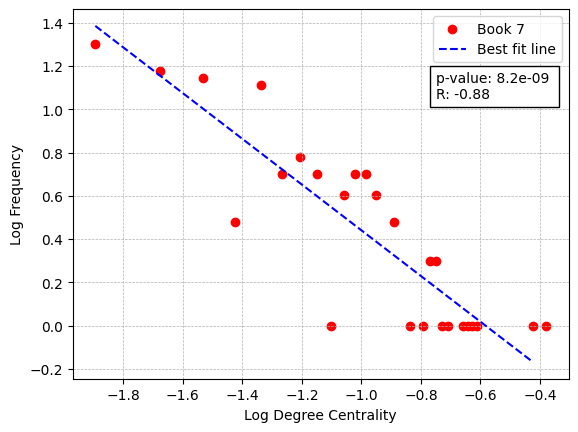

The slope of the line is: -1.0560698185721864


In [ ]:
# BOOK 7

# FIT OF THE DEGREE CENTRALITY DISTRIBUTION WITH LOG VALUES
values_7 = list(degree_7.values())
freq, bins = np.histogram(values_7, bins=50)

# Calculate bin centers
x = (bins[:-1] + bins[1:]) / 2  # x = center value of each bin
y = freq  # y = occurrence

# Filter out zero values (they are values it added, not ours)
non_zero_indices = np.where(y > 0)
x_display = x[non_zero_indices]
y_display = y[non_zero_indices]

# Exclude the last value for the fit
fit_points = np.where(x_display < np.max(x_display))
x_fit = x_display[fit_points]
y_fit = y_display[fit_points]

# Take the logarithm of x and y
log_x_display = np.log10(x_display)
log_y_display = np.log10(y_display)
log_x_fit = np.log10(x_fit)
log_y_fit = np.log10(y_fit)

# Fit a straight line to the data
coeffs = np.polyfit(log_x_fit, log_y_fit, 1)

# Generate y-values for the fitted line
fitted_y = coeffs[0] * log_x_fit + coeffs[1]

# Perform linear regression and get p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(log_x_fit, log_y_fit) # r_value -> is the pearson correlation coefficient
                                                                                     # p_value -> degree of confidence in rejecting the null hypothesis (the lower the better)
plt.scatter(log_x_display, log_y_display, color='r', label='Book 7')
plt.plot(log_x_fit, fitted_y, 'b--', label='Best fit line')  # Plot fitted line
plt.legend()
plt.xlabel('Log Degree Centrality')
plt.ylabel('Log Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.text(-0.75, 1.05, f'p-value: {p_value:.1e} \nR: {r_value: .2f}', bbox=dict(facecolor='white')) # Add p-value to the plot at the upper right corner

plt.show()

print(f"The slope of the line is: {slope}")

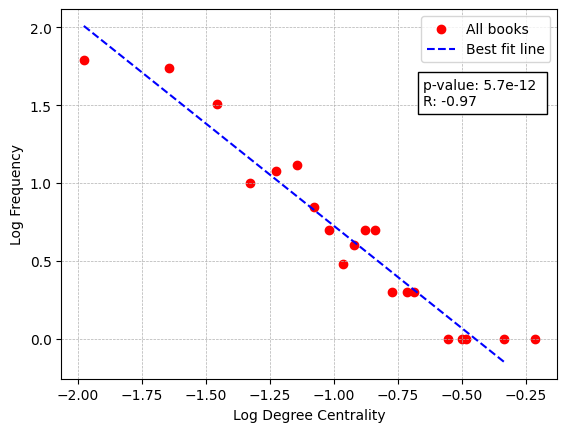

The slope of the line is: -1.3160263476016292


In [ ]:
# BOOK ALL

# FIT OF THE DEGREE CENTRALITY DISTRIBUTION WITH LOG VALUES
values_all = list(degree_all.values())
freq, bins = np.histogram(values_all, bins=50)

# Calculate bin centers
x = (bins[:-1] + bins[1:]) / 2  # x = center value of each bin
y = freq  # y = occurrence

# Filter out zero values (they are values it added, not ours)
non_zero_indices = np.where(y > 0)
x_display = x[non_zero_indices]
y_display = y[non_zero_indices]

# Exclude the last value for the fit
fit_points = np.where(x_display < np.max(x_display))
x_fit = x_display[fit_points]
y_fit = y_display[fit_points]

# Take the logarithm of x and y
log_x_display = np.log10(x_display)
log_y_display = np.log10(y_display)
log_x_fit = np.log10(x_fit)
log_y_fit = np.log10(y_fit)

# Fit a straight line to the data
coeffs = np.polyfit(log_x_fit, log_y_fit, 1)

# Generate y-values for the fitted line
fitted_y = coeffs[0] * log_x_fit + coeffs[1]

# Perform linear regression and get p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(log_x_fit, log_y_fit) # r_value -> is the pearson correlation coefficient
                                                                                     # p_value -> degree of confidence in rejecting the null hypothesis (the lower the better)
plt.scatter(log_x_display, log_y_display, color='r', label='All books')
plt.plot(log_x_fit, fitted_y, 'b--', label='Best fit line')  # Plot fitted line
plt.legend()
plt.xlabel('Log Degree Centrality')
plt.ylabel('Log Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.text(-0.65, 1.5, f'p-value: {p_value:.1e} \nR: {r_value: .2f}', bbox=dict(facecolor='white')) # Add p-value to the plot at the upper right corner

plt.show()

print(f"The slope of the line is: {slope}")

### Cumulative Distribution for Degree Centrality

In [ ]:
# # for debugging, to check if the frequecies are actual frequencies (the total sum must be 1).

# counts, bin_edges = np.histogram(values, bins=60, weights=np.ones(len(values)) / len(values))


# total_sum = 0

# for i in range(len(counts)):
#   total_sum = total_sum + counts[i]

# print(total_sum) # should be 1

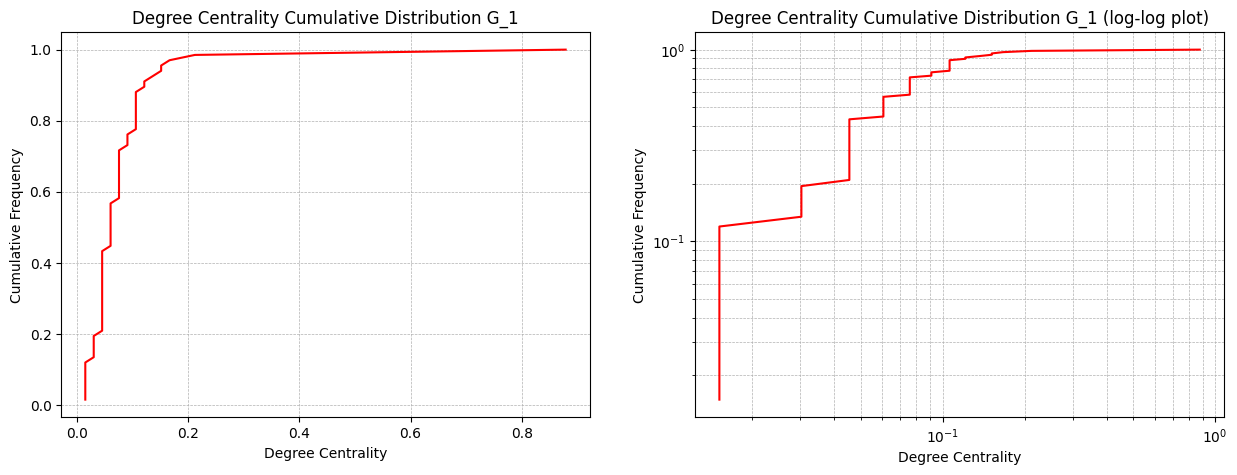

In [ ]:
# cumulative distribution
# BOOK1

# Extract the values and compute the frequencies
values = list(degree_1.values())
values.sort()

# Compute the cumulative frequencies
cumulative_frequencies = np.cumsum(np.ones(len(values)) / len(values)) #each point has probability 1/67, on it you apply the cumulative function to do the sum of these probabilities at each point i in the array

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(values, cumulative_frequencies, color = 'r')
plt.xlabel('Degree Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Degree Centrality Cumulative Distribution G_1')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot( 1, 2, 2)
plt.plot(values, cumulative_frequencies, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Degree Centrality Cumulative Distribution G_1 (log-log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)


# Show the plot
plt.show()


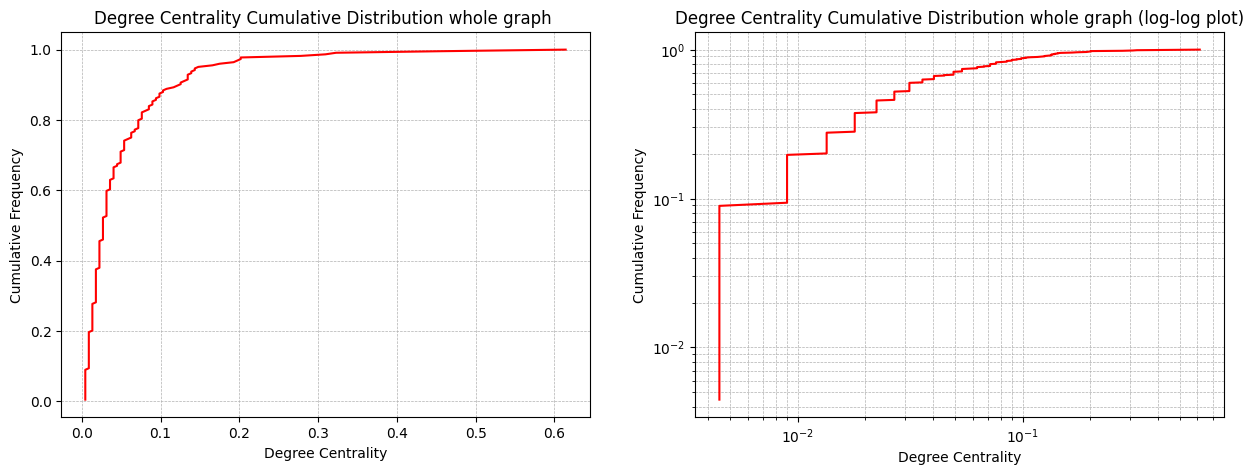

In [ ]:
# cumulative distribution
# ALL BOOKS

# Extract the values and compute the frequencies
values_all = list(degree_all.values())
values_all.sort()

# Compute the cumulative frequencies
cumulative_frequencies_all = np.cumsum(np.ones(len(values_all)) / len(values_all))

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(values_all, cumulative_frequencies_all, color = 'r')
plt.xlabel('Degree Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Degree Centrality Cumulative Distribution whole graph ')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot( 1, 2, 2)
plt.plot(values_all, cumulative_frequencies_all, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Degree Centrality Cumulative Distribution whole graph (log-log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)


# Show the plot
plt.show()


## Eigenvector centrality

In [ ]:
eig_centrality_1 = nx.eigenvector_centrality(G_1, weight='Weight')
eig_centrality_2 = nx.eigenvector_centrality(G_2, weight='Weight')
eig_centrality_3 = nx.eigenvector_centrality(G_3, weight='Weight')
eig_centrality_4 = nx.eigenvector_centrality(G_4, weight='Weight')
eig_centrality_5 = nx.eigenvector_centrality(G_5, weight='Weight')
eig_centrality_6 = nx.eigenvector_centrality(G_6, weight='Weight')
eig_centrality_7 = nx.eigenvector_centrality(G_7, weight='Weight')
eig_centrality_all = nx.eigenvector_centrality(G_all, weight = 'Weight')

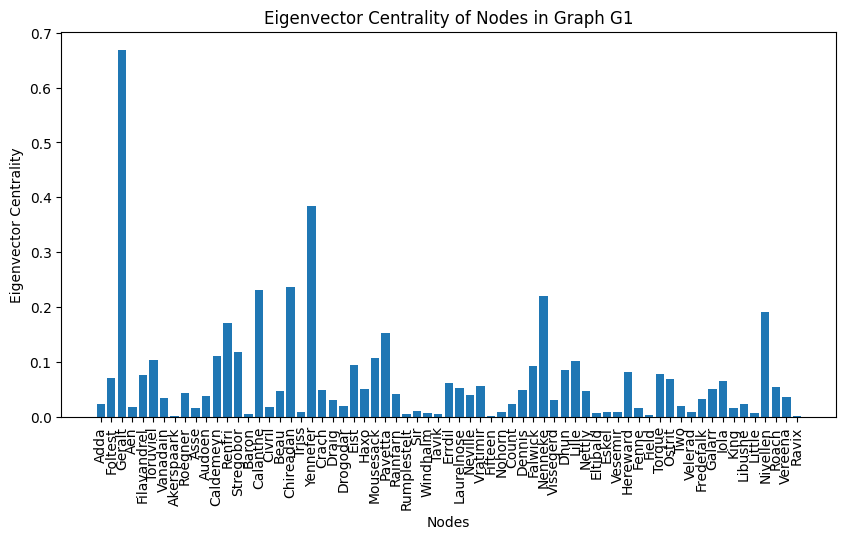

In [ ]:
# BOOK 1
nodes = eig_centrality_1.keys()
centralities = eig_centrality_1.values()

plt.figure(figsize=(10,5))
plt.bar(nodes, centralities)
plt.xlabel('Nodes')
plt.ylabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality of Nodes in Graph G1')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# # BOOK 2
# nodes = eig_centrality_2.keys()
# centralities = eig_centrality_2.values()

# plt.figure(figsize=(10,5))
# plt.bar(nodes, centralities)
# plt.xlabel('Nodes')
# plt.ylabel('Eigenvector Centrality')
# plt.title('Eigenvector Centrality of Nodes in Graph G2')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 3
# nodes = eig_centrality_3.keys()
# centralities = eig_centrality_3.values()

# plt.figure(figsize=(10,5))
# plt.bar(nodes, centralities)
# plt.xlabel('Nodes')
# plt.ylabel('Eigenvector Centrality')
# plt.title('Eigenvector Centrality of Nodes in Graph G3')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 4
# nodes = eig_centrality_4.keys()
# centralities = eig_centrality_4.values()

# plt.figure(figsize=(10,5))
# plt.bar(nodes, centralities)
# plt.xlabel('Nodes')
# plt.ylabel('Eigenvector Centrality')
# plt.title('Eigenvector Centrality of Nodes in Graph G4')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 5
# nodes = eig_centrality_5.keys()
# centralities = eig_centrality_5.values()

# plt.figure(figsize=(10,5))
# plt.bar(nodes, centralities)
# plt.xlabel('Nodes')
# plt.ylabel('Eigenvector Centrality')
# plt.title('Eigenvector Centrality of Nodes in Graph G5')
# plt.xticks(rotation=90)
# plt.show()



# BOOK 6
# nodes = eig_centrality_6.keys()
# centralities = eig_centrality_6.values()

# plt.figure(figsize=(10,5))
# plt.bar(nodes, centralities)
# plt.xlabel('Nodes')
# plt.ylabel('Eigenvector Centrality')
# plt.title('Eigenvector Centrality of Nodes in Graph G6')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 7
# nodes = eig_centrality_7.keys()
# centralities = eig_centrality_7.values()

# plt.figure(figsize=(20,5))
# plt.bar(nodes, centralities)
# plt.xlabel('Nodes')
# plt.ylabel('Eigenvector Centrality')
# plt.title('Eigenvector Centrality of Nodes in Graph G7')
# plt.xticks(rotation=90)
# plt.show()

#### Eigenvector centrality *distribution* -> # SCATTER PLOT

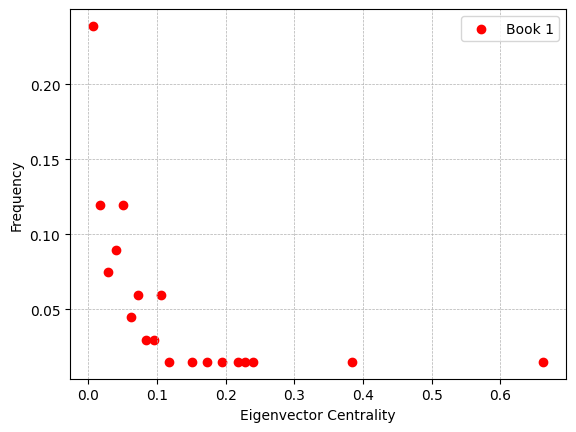

In [ ]:
# BOOK1
values_1 = list(eig_centrality_1.values())
tot_nodes_1 = df_nodes1.shape[0]
freq, bins = np.histogram(values_1, bins=60)

bins = (bins[:-1] + bins[1:]) / 2  # x = center value of each bin
freq = [i/tot_nodes_1 for i in freq] # find the frequency by divinding freq list by the tot nodes
freq = np.array(freq, dtype='float32')  # convert freq from list to numpy array

#Filter out zero values (they are values it added, not ours)
non_zero_indices = np.where(freq > 0)
bins = bins[non_zero_indices]
freq = freq[non_zero_indices]

plt.scatter(bins, freq, color='r', label = 'Book 1')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

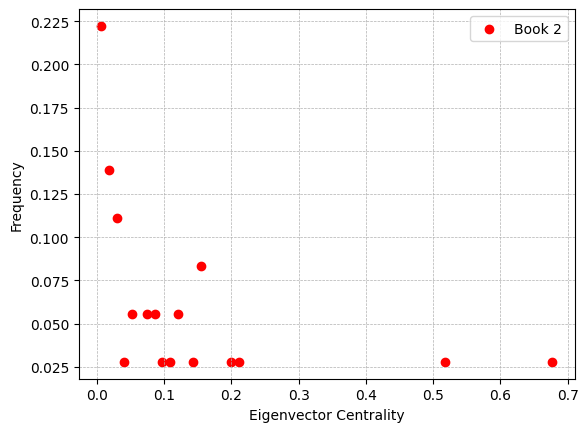

In [ ]:
# BOOK2
values_2 = list(eig_centrality_2.values())
tot_nodes_2 = df_nodes2.shape[0]
freq, bins = np.histogram(values_2, bins=60)

bins = (bins[:-1] + bins[1:]) / 2  # x = center value of each bin
freq = [i/tot_nodes_2 for i in freq] # find the frequency by divinding freq list by the tot nodes
freq = np.array(freq, dtype='float32')  # convert freq from list to numpy array

#Filter out zero values (they are values it added, not ours)
non_zero_indices = np.where(freq > 0)
bins = bins[non_zero_indices]
freq = freq[non_zero_indices]

plt.scatter(bins, freq, color='r', label = 'Book 2')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

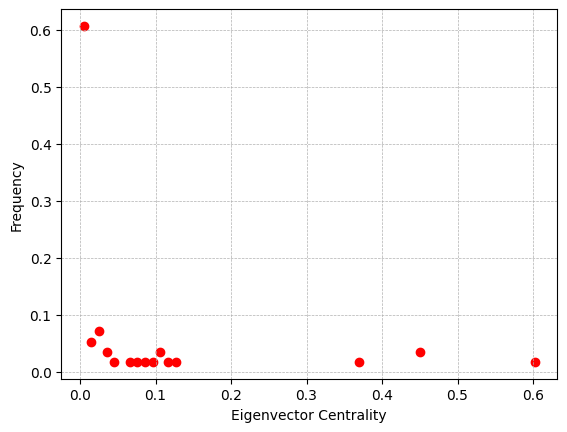

In [ ]:
# BOOK3
values_3 = list(eig_centrality_3.values())
tot_nodes_3 = df_nodes3.shape[0]
freq, bins = np.histogram(values_3, bins=60)

bins = (bins[:-1] + bins[1:]) / 2  # x = center value of each bin
freq = [i/tot_nodes_3 for i in freq] # find the frequency by divinding freq list by the tot nodes
freq = np.array(freq, dtype='float32')  # convert freq from list to numpy array

#Filter out zero values (they are values it added, not ours)
non_zero_indices = np.where(freq > 0)
bins = bins[non_zero_indices]
freq = freq[non_zero_indices]

plt.scatter(bins, freq, color='r', label = 'Book 3')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

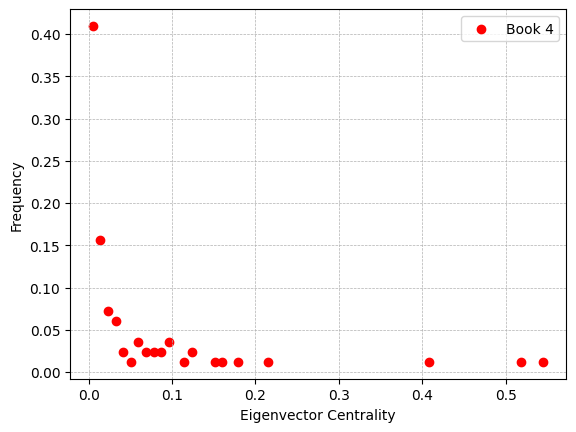

In [ ]:
# BOOK4
values_4 = list(eig_centrality_4.values())
tot_nodes_4 = df_nodes4.shape[0]
freq, bins = np.histogram(values_4, bins=60)

bins = (bins[:-1] + bins[1:]) / 2  # x = center value of each bin
freq = [i/tot_nodes_4 for i in freq] # find the frequency by divinding freq list by the tot nodes
freq = np.array(freq, dtype='float32')  # convert freq from list to numpy array

#Filter out zero values (they are values it added, not ours)
non_zero_indices = np.where(freq > 0)
bins = bins[non_zero_indices]
freq = freq[non_zero_indices]

plt.scatter(bins, freq, color='r', label = 'Book 4')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

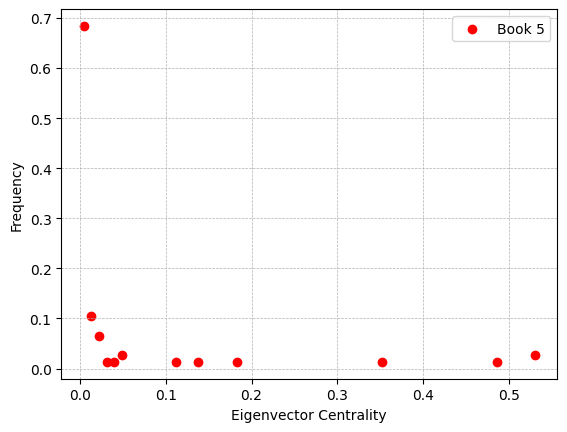

In [ ]:
# BOOK5
values_5 = list(eig_centrality_5.values())
tot_nodes_5 = df_nodes5.shape[0]
freq, bins = np.histogram(values_5, bins=60)

bins = (bins[:-1] + bins[1:]) / 2  # x = center value of each bin
freq = [i/tot_nodes_5 for i in freq] # find the frequency by divinding freq list by the tot nodes
freq = np.array(freq, dtype='float32')  # convert freq from list to numpy array

#Filter out zero values (they are values it added, not ours)
non_zero_indices = np.where(freq > 0)
bins = bins[non_zero_indices]
freq = freq[non_zero_indices]

plt.scatter(bins, freq, color='r', label = 'Book 5')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

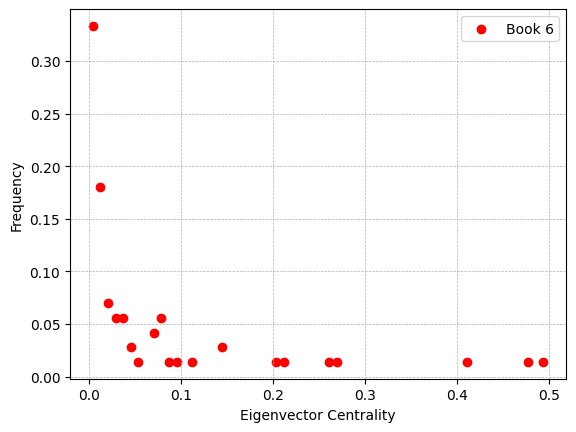

In [ ]:
# BOOK6

values_6 = list(eig_centrality_6.values())
tot_nodes_6 = df_nodes6.shape[0]
freq, bins = np.histogram(values_6, bins=60)

bins = (bins[:-1] + bins[1:]) / 2  # x = center value of each bin
freq = [i/tot_nodes_6 for i in freq] # find the frequency by divinding freq list by the tot nodes
freq = np.array(freq, dtype='float32')  # convert freq from list to numpy array

#Filter out zero values (they are values it added, not ours)
non_zero_indices = np.where(freq > 0)
bins = bins[non_zero_indices]
freq = freq[non_zero_indices]

plt.scatter(bins, freq, color='r', label = 'Book 6')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

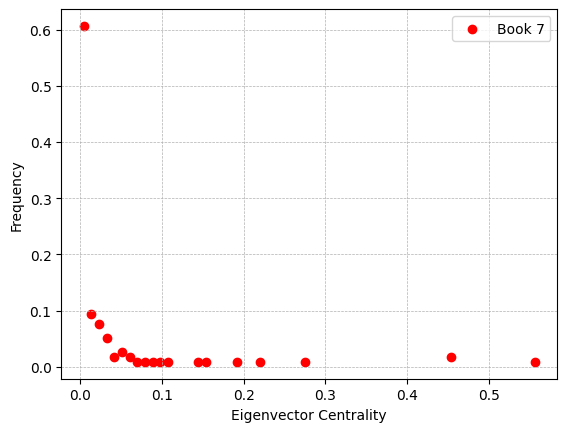

In [ ]:
# BOOK7

values_7 = list(eig_centrality_7.values())
tot_nodes_7 = df_nodes7.shape[0]
freq, bins = np.histogram(values_7, bins=60)

bins = (bins[:-1] + bins[1:]) / 2  # x = center value of each bin
freq = [i/tot_nodes_7 for i in freq] # find the frequency by divinding freq list by the tot nodes
freq = np.array(freq, dtype='float32')  # convert freq from list to numpy array

#Filter out zero values (they are values it added, not ours)
non_zero_indices = np.where(freq > 0)
bins = bins[non_zero_indices]
freq = freq[non_zero_indices]

plt.scatter(bins, freq, color='r', label = 'Book 7')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

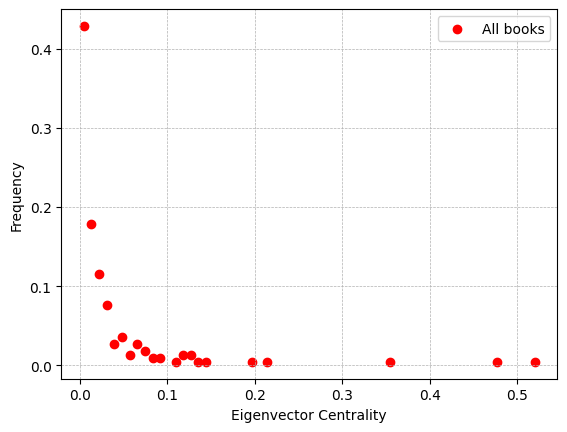

In [ ]:
# ALL BOOKS

values_all = list(eig_centrality_all.values())
tot_nodes_all = df_nodes_all.shape[0]
freq, bins = np.histogram(values_all, bins=60)

bins = (bins[:-1] + bins[1:]) / 2  # x = center value of each bin
freq = [i/tot_nodes_all for i in freq] # find the frequency by divinding freq list by the tot nodes
freq = np.array(freq, dtype='float32')  # convert freq from list to numpy array

#Filter out zero values (they are values it added, not ours)
non_zero_indices = np.where(freq > 0)
bins = bins[non_zero_indices]
freq = freq[non_zero_indices]

plt.scatter(bins, freq, color='r', label = 'All books')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

### Cumulative Distribution for Eigenvector Centrality

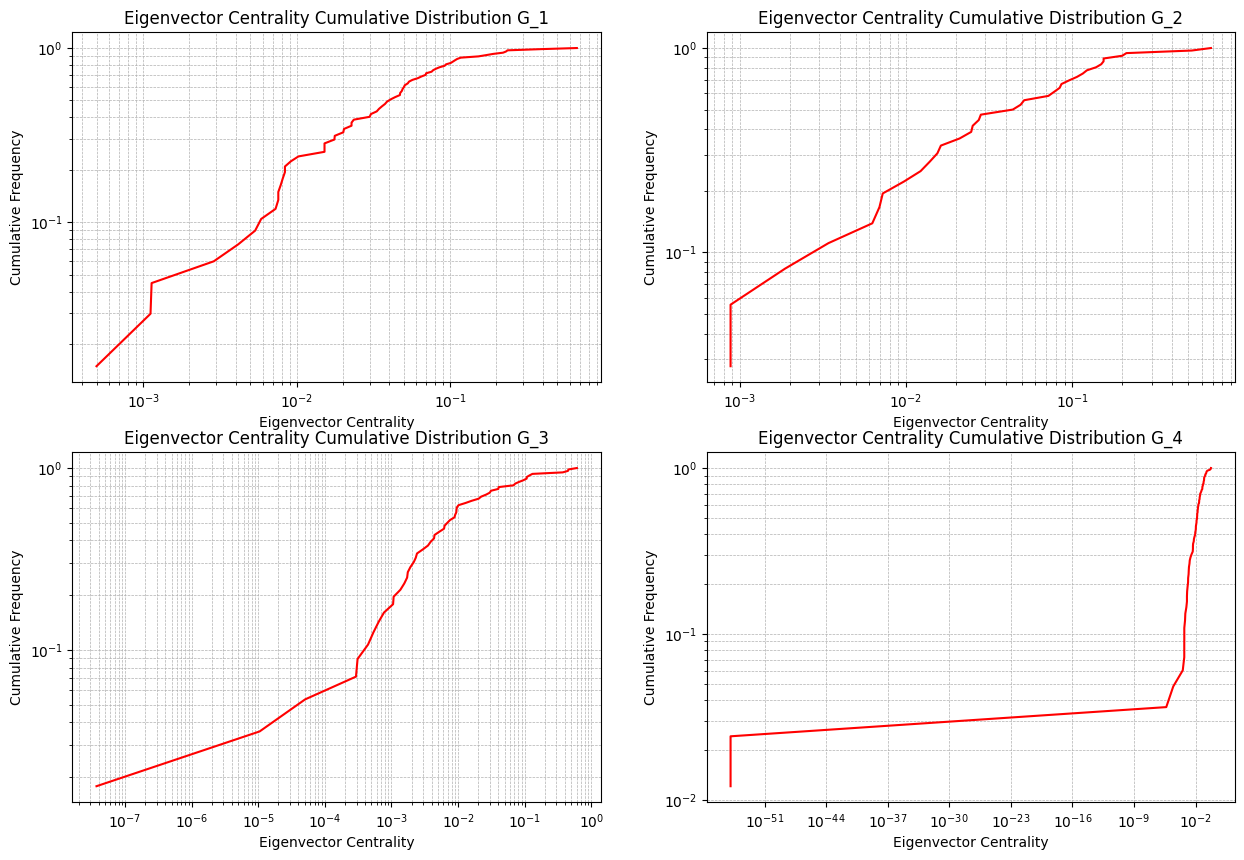

In [ ]:
#cumulative

# in log plot should be a line

# from BOOK1 TO BOOK 4

values_1 = list(eig_centrality_1.values())
values_1.sort()
cumulative_frequencies_1 = np.cumsum(np.ones(len(values_1)) / len(values_1))

values_2 = list(eig_centrality_2.values())
values_2.sort()
cumulative_frequencies_2 = np.cumsum(np.ones(len(values_2)) / len(values_2))

values_3 = list(eig_centrality_3.values())
values_3.sort()
cumulative_frequencies_3 = np.cumsum(np.ones(len(values_3)) / len(values_3))

values_4 = list(eig_centrality_4.values())
values_4.sort()
cumulative_frequencies_4 = np.cumsum(np.ones(len(values_4)) / len(values_4))


plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(values_1, cumulative_frequencies_1, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Eigenvector Centrality Cumulative Distribution G_1')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(2, 2, 2)
plt.plot(values_2, cumulative_frequencies_2, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Eigenvector Centrality Cumulative Distribution G_2')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(2, 2, 3)
plt.plot(values_3, cumulative_frequencies_3, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Eigenvector Centrality Cumulative Distribution G_3')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(2, 2, 4)
plt.plot(values_4, cumulative_frequencies_4, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Eigenvector Centrality Cumulative Distribution G_4')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()

# TO DO: FIT

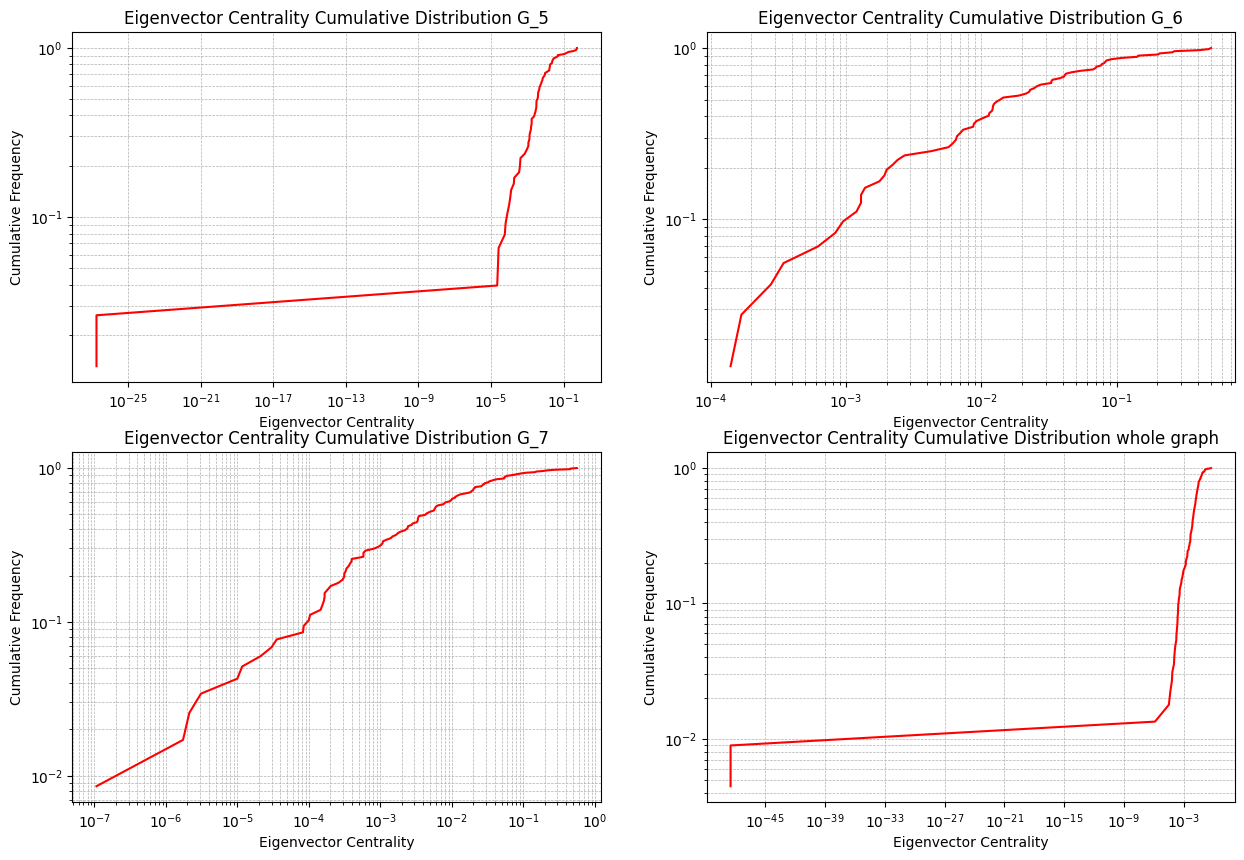

In [ ]:
# from BOOK 5 TO BOOK 7

values_5 = list(eig_centrality_5.values())
values_5.sort()
cumulative_frequencies_5 = np.cumsum(np.ones(len(values_5)) / len(values_5))

values_6 = list(eig_centrality_6.values())
values_6.sort()
cumulative_frequencies_6 = np.cumsum(np.ones(len(values_6)) / len(values_6))

values_7 = list(eig_centrality_7.values())
values_7.sort()
cumulative_frequencies_7 = np.cumsum(np.ones(len(values_7)) / len(values_7))

values_all = list(eig_centrality_all.values())
values_all.sort()
cumulative_frequencies_all = np.cumsum(np.ones(len(values_all)) / len(values_all))


plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(values_5, cumulative_frequencies_5, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Eigenvector Centrality Cumulative Distribution G_5')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(2, 2, 2)
plt.plot(values_6, cumulative_frequencies_6, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Eigenvector Centrality Cumulative Distribution G_6')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(2, 2, 3)
plt.plot(values_7, cumulative_frequencies_7, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Eigenvector Centrality Cumulative Distribution G_7')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(2, 2, 4)
plt.plot(values_all, cumulative_frequencies_all, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Eigenvector Centrality Cumulative Distribution whole graph')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()


## Betweenness centrality

In [ ]:
betweenness_1 = nx.betweenness_centrality(G_1, normalized=True, weight='Weight')
betweenness_2 = nx.betweenness_centrality(G_2, normalized=True, weight='Weight')
betweenness_3 = nx.betweenness_centrality(G_3, normalized=True, weight='Weight')
betweenness_4 = nx.betweenness_centrality(G_4, normalized=True, weight='Weight')
betweenness_5 = nx.betweenness_centrality(G_5, normalized=True, weight='Weight')
betweenness_6 = nx.betweenness_centrality(G_6, normalized=True, weight='Weight')
betweenness_7 = nx.betweenness_centrality(G_7, normalized=True, weight='Weight')
betweenness_all = nx.betweenness_centrality(G_all, normalized=True, weight = 'Weight')


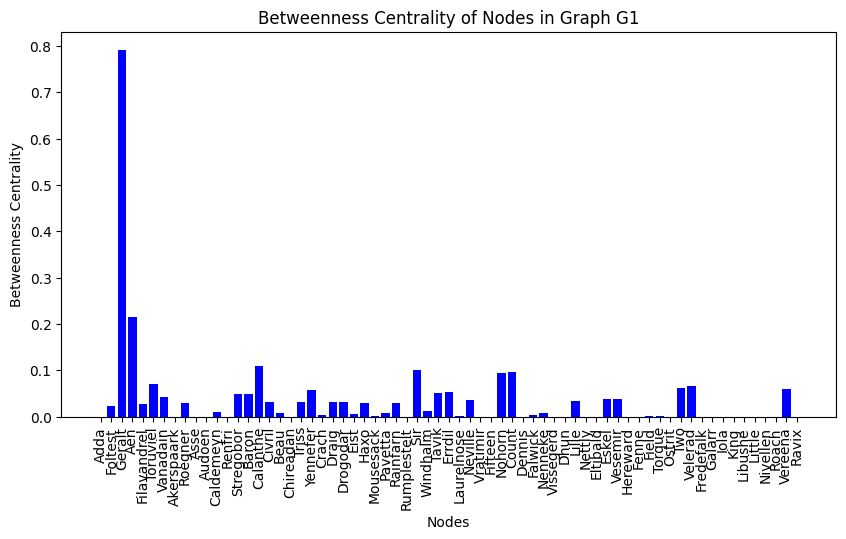

In [ ]:
# BOOK 1
betweenness_nodes = betweenness_1.keys()
betweenness_centralities = betweenness_1.values()

plt.figure(figsize=(10,5))
plt.bar(betweenness_nodes, betweenness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality of Nodes in Graph G1')
plt.xticks(rotation=90)
plt.show()



# BOOK 2
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# betweenness_nodes = betweenness_2.keys()
# betweenness_centralities = betweenness_2.values()

# plt.figure(figsize=(10,5))
# plt.bar(betweenness_nodes, betweenness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Betweenness Centrality')
# plt.title('Betweenness Centrality of Nodes in Graph G2')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 3
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# betweenness_nodes = betweenness_3.keys()
# betweenness_centralities = betweenness_3.values()

# plt.figure(figsize=(10,5))
# plt.bar(betweenness_nodes, betweenness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Betweenness Centrality')
# plt.title('Betweenness Centrality of Nodes in Graph G3')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 4
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# betweenness_nodes = betweenness_4.keys()
# betweenness_centralities = betweenness_4.values()

# plt.figure(figsize=(13,5))
# plt.bar(betweenness_nodes, betweenness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Betweenness Centrality')
# plt.title('Betweenness Centrality of Nodes in Graph G4')
# plt.xticks(rotation=90)
# plt.show()



# BOOK 5
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# betweenness_nodes = betweenness_5.keys()
# betweenness_centralities = betweenness_5.values()

# plt.figure(figsize=(13,5))
# plt.bar(betweenness_nodes, betweenness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Betweenness Centrality')
# plt.title('Betweenness Centrality of Nodes in Graph G5')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 6
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# betweenness_nodes = betweenness_6.keys()
# betweenness_centralities = betweenness_6.values()

# plt.figure(figsize=(13,5))
# plt.bar(betweenness_nodes, betweenness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Betweenness Centrality')
# plt.title('Betweenness Centrality of Nodes in Graph G6')
# plt.xticks(rotation=90)
# plt.show()

# BOOK 7
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# betweenness_nodes = betweenness_7.keys()
# betweenness_centralities = betweenness_7.values()

# plt.figure(figsize=(15,5))
# plt.bar(betweenness_nodes, betweenness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Betweenness Centrality')
# plt.title('Betweenness Centrality of Nodes in Graph G7')
# plt.xticks(rotation=90)
# plt.show()

In [ ]:
# Find nodes with degree centrality above a certain threshold: they are the most important nodes (with more edges)
threshold = 0.15 # we have to choose a value

high_betweenness_nodes_1 = [node for node, bet in betweenness_1.items() if bet > threshold]
high_betweenness_nodes_2 = [node for node, bet in betweenness_2.items() if bet > threshold]
high_betweenness_nodes_3 = [node for node, bet in betweenness_3.items() if bet > threshold]
high_betweenness_nodes_4 = [node for node, bet in betweenness_4.items() if bet > threshold]
high_betweenness_nodes_5 = [node for node, bet in betweenness_5.items() if bet > threshold]
high_betweenness_nodes_6 = [node for node, bet in betweenness_6.items() if bet > threshold]
high_betweenness_nodes_7 = [node for node, bet in betweenness_7.items() if bet > threshold]
high_betweenness_nodes_all = [node for node, bet in betweenness_all.items() if bet > threshold]

print("Graph 1 - Nodes with betweenness centrality above ", threshold, ": ", high_betweenness_nodes_1)
print("Graph 2 - Nodes with betweenness centrality above ", threshold, ": ", high_betweenness_nodes_2)
print("Graph 3 - Nodes with betweenness centrality above ", threshold, ": ", high_betweenness_nodes_3)
print("Graph 4 - Nodes with betweenness centrality above ", threshold, ": ", high_betweenness_nodes_4)
print("Graph 5 - Nodes with betweenness centrality above ", threshold, ": ", high_betweenness_nodes_5)
print("Graph 6 - Nodes with betweenness centrality above ", threshold, ": ", high_betweenness_nodes_6)
print("Graph 7 - Nodes with betweenness centrality above ", threshold, ": ", high_betweenness_nodes_7)
print("Whole Graph - Nodes with betweenness centrality above ", threshold, ": ", high_betweenness_nodes_all)


Graph 1 - Nodes with betweenness centrality above  0.15 :  ['Geralt', 'Aen']
Graph 2 - Nodes with betweenness centrality above  0.15 :  ['Braenn', 'Geralt', 'Dandelion', 'Yennefer', 'Ciri', 'Yurga']
Graph 3 - Nodes with betweenness centrality above  0.15 :  ['Ciri', 'Yennefer', 'Geralt', 'Foltest']
Graph 4 - Nodes with betweenness centrality above  0.15 :  ['Ciri', 'Emhyr']
Graph 5 - Nodes with betweenness centrality above  0.15 :  ['Geralt']
Graph 6 - Nodes with betweenness centrality above  0.15 :  ['Ciri', 'Geralt', 'Emhyr']
Graph 7 - Nodes with betweenness centrality above  0.15 :  ['Geralt', 'Zoltan']
Whole Graph - Nodes with betweenness centrality above  0.15 :  ['Geralt']


#### Betweenness Centrality ***distribution***



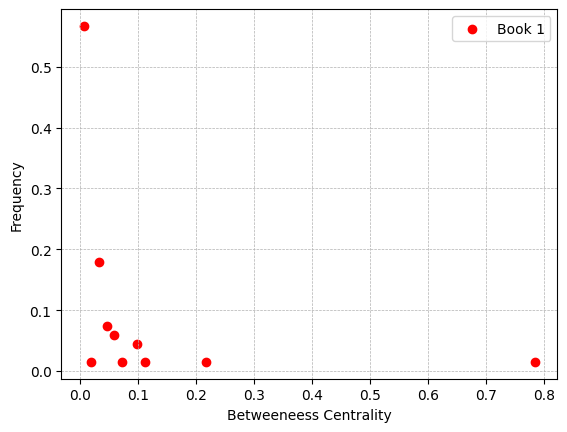

In [ ]:
 #SCATTER

# BOOK 1
values_1 = list(betweenness_1.values())
freq, bins = np.histogram(values_1, bins=60)

bins = (bins[:-1] + bins[1:]) / 2           # x = center value of each bin
freq = [i/df_nodes1.shape[0] for i in freq] # find the frequency by divinding freq list by the tot nodes
freq = np.array(freq, dtype='float32')      # convert freq from list to numpy array

non_zero_indices = np.where(freq > 0)       # filter out zero values (they are values it added, not ours)
bins = bins[non_zero_indices]
freq = freq[non_zero_indices]

plt.scatter(bins, freq, color='r', label='Book 1')
plt.legend()
plt.xlabel('Betweeneess Centrality')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()


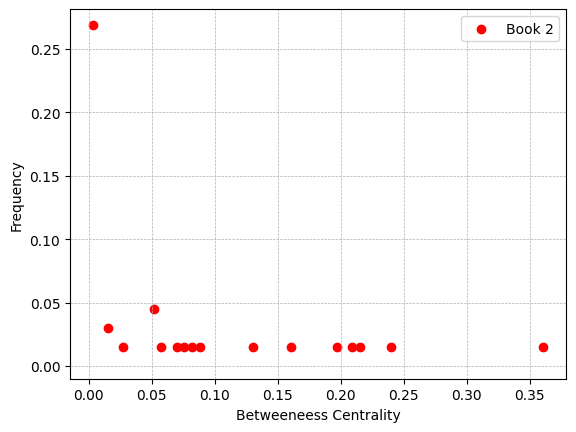

In [ ]:
# BOOK 2
values_2 = list(betweenness_2.values())
freq, bins = np.histogram(values_2, bins=60)

bins = (bins[:-1] + bins[1:]) / 2           # x = center value of each bin
freq = [i/df_nodes1.shape[0] for i in freq] # find the frequency by divinding freq list by the tot nodes
freq = np.array(freq, dtype='float32')      # convert freq from list to numpy array

non_zero_indices = np.where(freq > 0)       # filter out zero values (they are values it added, not ours)
bins = bins[non_zero_indices]
freq = freq[non_zero_indices]

plt.scatter(bins, freq, color='r', label='Book 2')
plt.legend()
plt.xlabel('Betweeneess Centrality')
plt.ylabel('Frequency')
plt.ylim(-0.01)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()

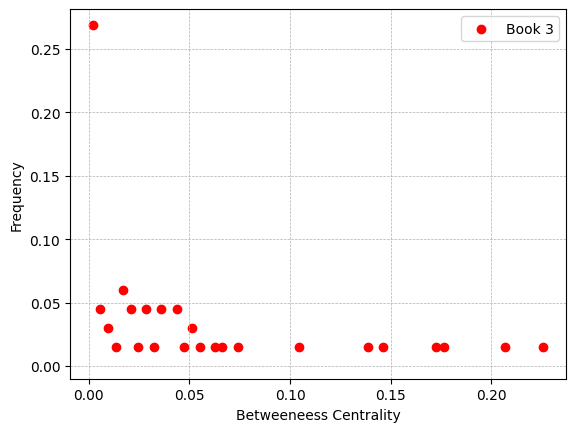

In [ ]:
# BOOK 3
values_3 = list(betweenness_3.values())
freq, bins = np.histogram(values_3, bins=60)

bins = (bins[:-1] + bins[1:]) / 2           # x = center value of each bin
freq = [i/df_nodes1.shape[0] for i in freq] # find the frequency by divinding freq list by the tot nodes
freq = np.array(freq, dtype='float32')      # convert freq from list to numpy array

non_zero_indices = np.where(freq > 0)       # filter out zero values (they are values it added, not ours)
bins = bins[non_zero_indices]
freq = freq[non_zero_indices]

plt.scatter(bins, freq, color='r', label='Book 3')
plt.legend()
plt.xlabel('Betweeneess Centrality')
plt.ylabel('Frequency')
plt.ylim(-0.01)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()

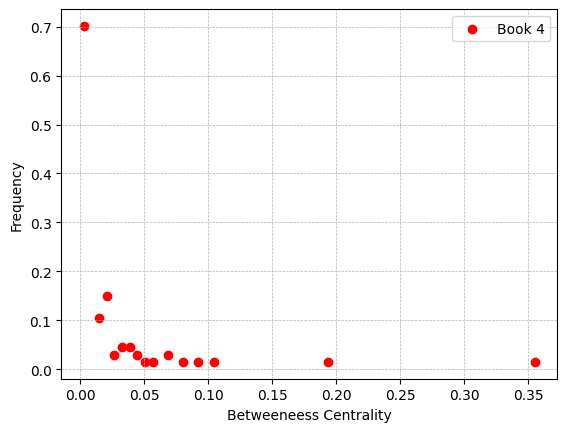

In [ ]:
# BOOK 4
values_4 = list(betweenness_4.values())
freq, bins = np.histogram(values_4, bins=60)

bins = (bins[:-1] + bins[1:]) / 2           # x = center value of each bin
freq = [i/df_nodes1.shape[0] for i in freq] # find the frequency by divinding freq list by the tot nodes
freq = np.array(freq, dtype='float32')      # convert freq from list to numpy array

non_zero_indices = np.where(freq > 0)       # filter out zero values (they are values it added, not ours)
bins = bins[non_zero_indices]
freq = freq[non_zero_indices]

plt.scatter(bins, freq, color='r', label='Book 4')
plt.legend()
plt.xlabel('Betweeneess Centrality')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()

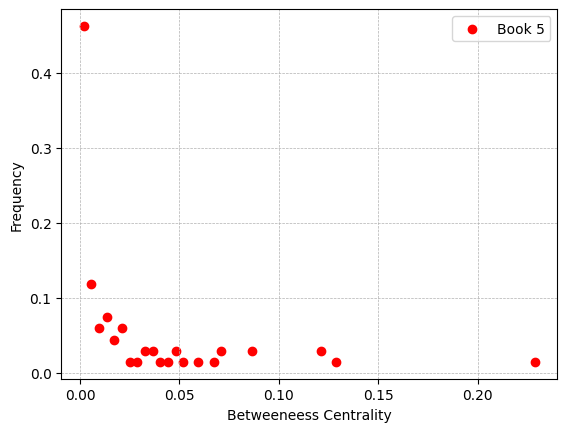

In [ ]:
# BOOK 5
values_5 = list(betweenness_5.values())
freq, bins = np.histogram(values_5, bins=60)

bins = (bins[:-1] + bins[1:]) / 2           # x = center value of each bin
freq = [i/df_nodes1.shape[0] for i in freq] # find the frequency by divinding freq list by the tot nodes
freq = np.array(freq, dtype='float32')      # convert freq from list to numpy array

non_zero_indices = np.where(freq > 0)       # filter out zero values (they are values it added, not ours)
bins = bins[non_zero_indices]
freq = freq[non_zero_indices]

plt.scatter(bins, freq, color='r', label='Book 5')
plt.legend()
plt.xlabel('Betweeneess Centrality')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()

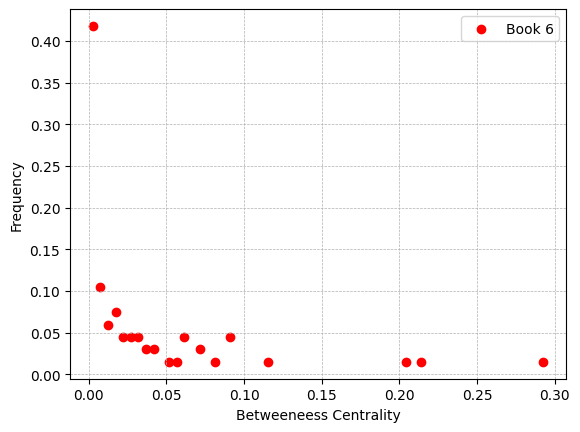

In [ ]:
# BOOK 6
values_6 = list(betweenness_6.values())
freq, bins = np.histogram(values_6, bins=60)

bins = (bins[:-1] + bins[1:]) / 2           # x = center value of each bin
freq = [i/df_nodes1.shape[0] for i in freq] # find the frequency by divinding freq list by the tot nodes
freq = np.array(freq, dtype='float32')      # convert freq from list to numpy array

non_zero_indices = np.where(freq > 0)       # filter out zero values (they are values it added, not ours)
bins = bins[non_zero_indices]
freq = freq[non_zero_indices]

plt.scatter(bins, freq, color='r', label='Book 6')
plt.legend()
plt.xlabel('Betweeneess Centrality')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()

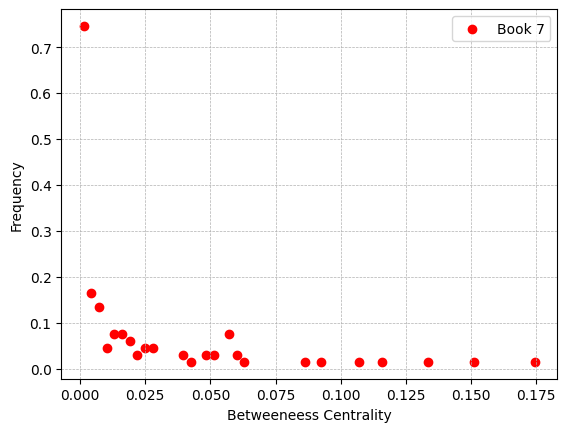

In [ ]:
# BOOK 7
values_7= list(betweenness_7.values())
freq, bins = np.histogram(values_7, bins=60)

bins = (bins[:-1] + bins[1:]) / 2           # x = center value of each bin
freq = [i/df_nodes1.shape[0] for i in freq] # find the frequency by divinding freq list by the tot nodes
freq = np.array(freq, dtype='float32')      # convert freq from list to numpy array

non_zero_indices = np.where(freq > 0)       # filter out zero values (they are values it added, not ours)
bins = bins[non_zero_indices]
freq = freq[non_zero_indices]

plt.scatter(bins, freq, color='r', label='Book 7')
plt.legend()
plt.xlabel('Betweeneess Centrality')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()

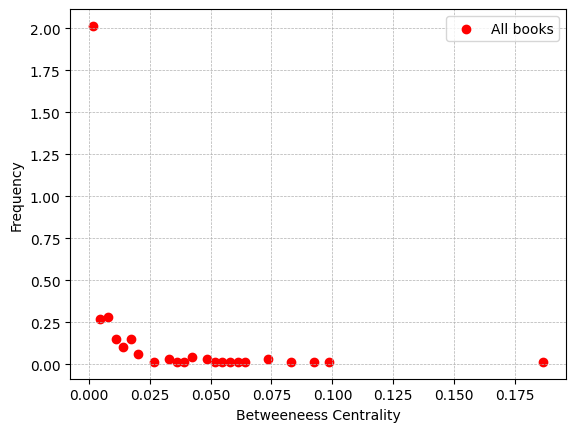

In [ ]:
# BOOK ALL
values_all = list(betweenness_all.values())
freq, bins = np.histogram(values_all, bins=60)

bins = (bins[:-1] + bins[1:]) / 2           # x = center value of each bin
freq = [i/df_nodes1.shape[0] for i in freq] # find the frequency by divinding freq list by the tot nodes
freq = np.array(freq, dtype='float32')      # convert freq from list to numpy array

non_zero_indices = np.where(freq > 0)       # filter out zero values (they are values it added, not ours)
bins = bins[non_zero_indices]
freq = freq[non_zero_indices]

plt.scatter(bins, freq, color='r', label='All books')
plt.legend()
plt.xlabel('Betweeneess Centrality')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()

### Cumulative Distribution for Betweenness Centrality

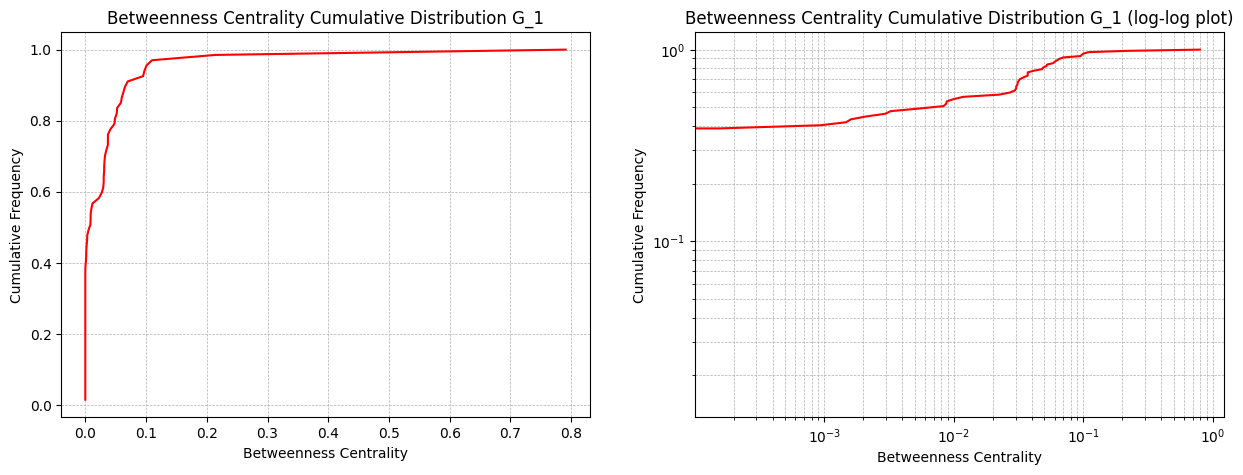

In [ ]:
# cumulative

# Extract the values and compute the frequencies
values = list(betweenness_1.values())
values.sort()

# Compute the cumulative frequencies
cumulative_frequencies = np.cumsum(np.ones(len(values)) / len(values))

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(values, cumulative_frequencies, color = 'r')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Betweenness Centrality Cumulative Distribution G_1')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(1, 2, 2)
#log plot
plt.plot(values, cumulative_frequencies, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Betweenness Centrality Cumulative Distribution G_1 (log-log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


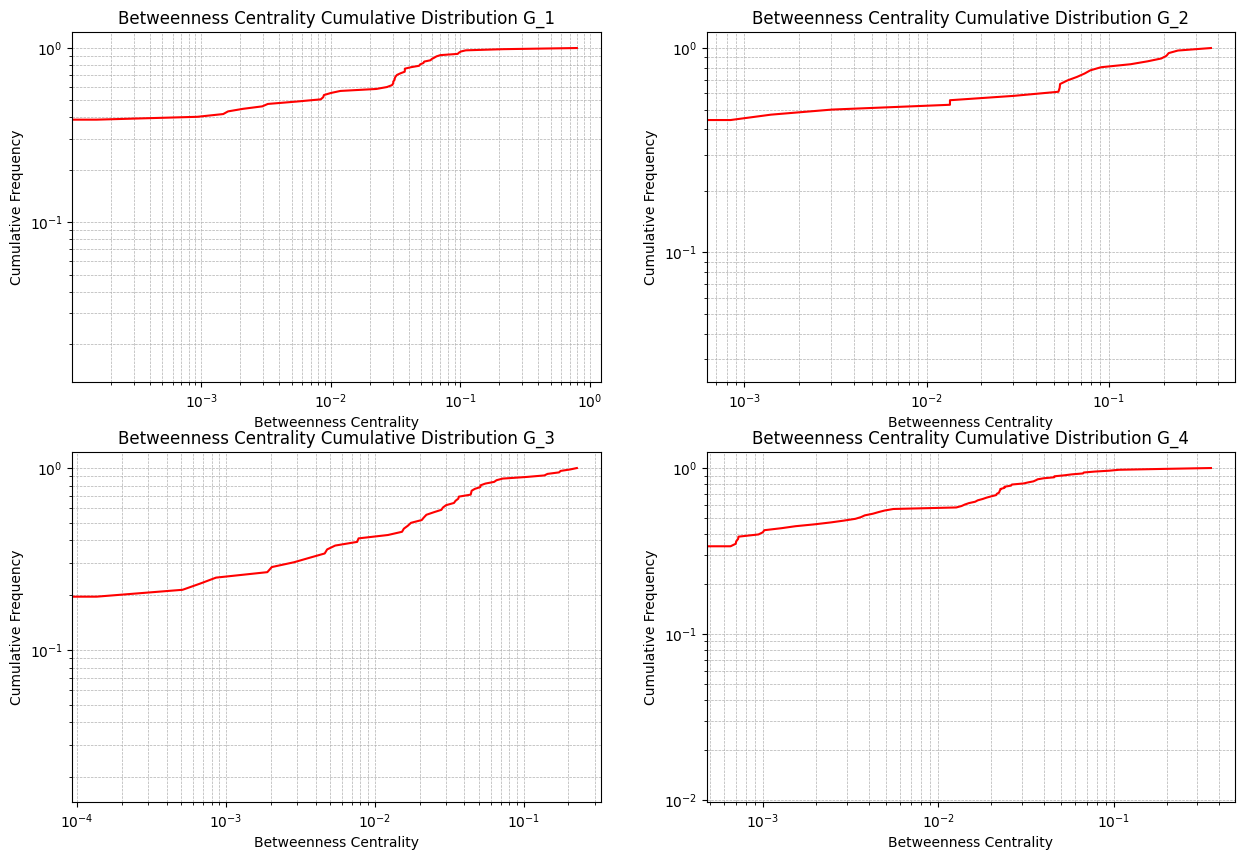

In [ ]:
#cumulative

# in log plot should be a line

# from BOOK1 TO BOOK 4

values_1 = list(betweenness_1.values())
values_1.sort()
cumulative_frequencies_1 = np.cumsum(np.ones(len(values_1)) / len(values_1))

values_2 = list(betweenness_2.values())
values_2.sort()
cumulative_frequencies_2 = np.cumsum(np.ones(len(values_2)) / len(values_2))

values_3 = list(betweenness_3.values())
values_3.sort()
cumulative_frequencies_3 = np.cumsum(np.ones(len(values_3)) / len(values_3))

values_4 = list(betweenness_4.values())
values_4.sort()
cumulative_frequencies_4 = np.cumsum(np.ones(len(values_4)) / len(values_4))


plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(values_1, cumulative_frequencies_1, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Betweenness Centrality Cumulative Distribution G_1')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(2, 2, 2)
plt.plot(values_2, cumulative_frequencies_2, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Betweenness Centrality Cumulative Distribution G_2')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(2, 2, 3)
plt.plot(values_3, cumulative_frequencies_3, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Betweenness Centrality Cumulative Distribution G_3')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(2, 2, 4)
plt.plot(values_4, cumulative_frequencies_4, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Betweenness Centrality Cumulative Distribution G_4')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()

# TO DO: FIT

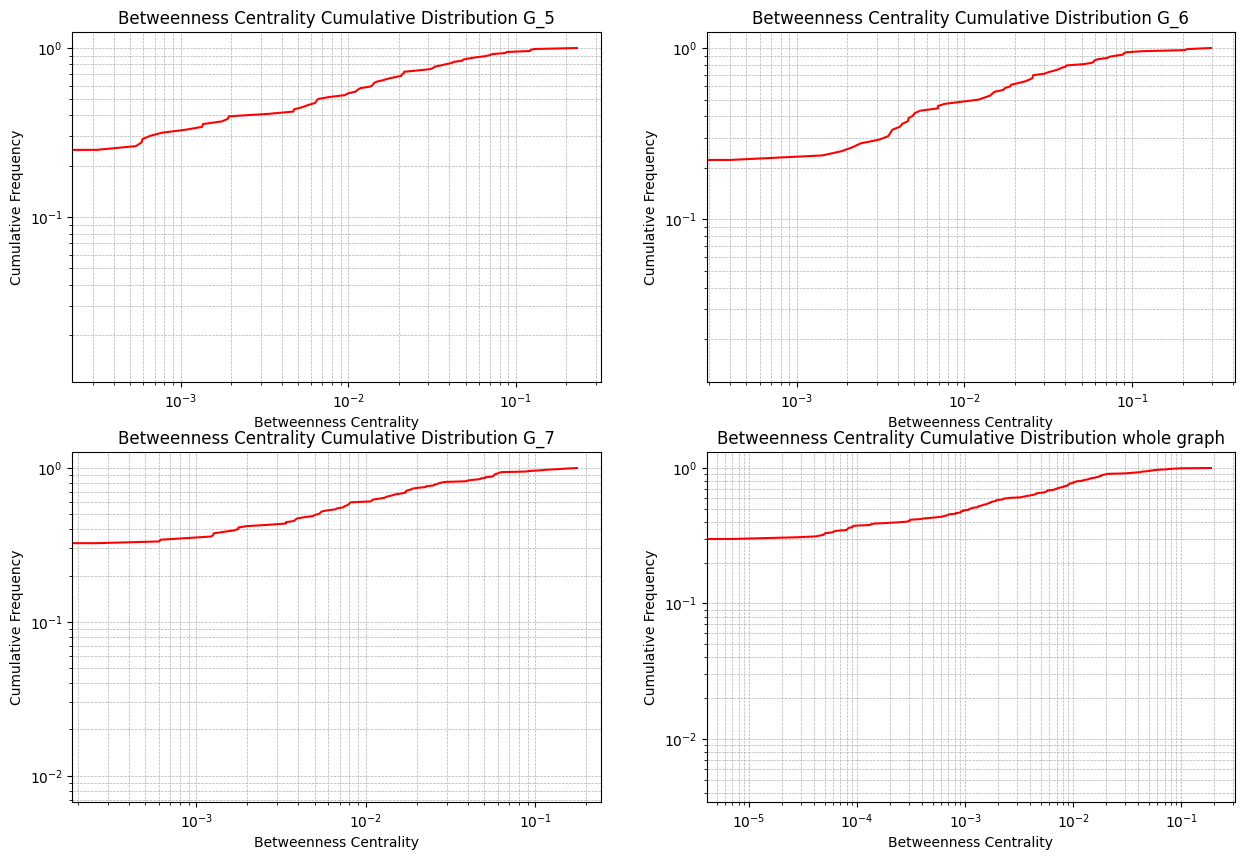

In [ ]:
# from BOOK 5 TO BOOK 7

values_5 = list(betweenness_5.values())
values_5.sort()
cumulative_frequencies_5 = np.cumsum(np.ones(len(values_5)) / len(values_5))

values_6 = list(betweenness_6.values())
values_6.sort()
cumulative_frequencies_6 = np.cumsum(np.ones(len(values_6)) / len(values_6))

values_7 = list(betweenness_7.values())
values_7.sort()
cumulative_frequencies_7 = np.cumsum(np.ones(len(values_7)) / len(values_7))

values_all = list(betweenness_all.values())
values_all.sort()
cumulative_frequencies_all = np.cumsum(np.ones(len(values_all)) / len(values_all))


plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(values_5, cumulative_frequencies_5, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Betweenness Centrality Cumulative Distribution G_5')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(2, 2, 2)
plt.plot(values_6, cumulative_frequencies_6, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Betweenness Centrality Cumulative Distribution G_6')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(2, 2, 3)
plt.plot(values_7, cumulative_frequencies_7, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Betweenness Centrality Cumulative Distribution G_7')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(2, 2, 4)
plt.plot(values_all, cumulative_frequencies_all, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Betweenness Centrality Cumulative Distribution whole graph')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()


## Closeness centrality

In [ ]:
closeness_1 = nx.closeness_centrality(G_1)
closeness_2 = nx.closeness_centrality(G_2)
closeness_3 = nx.closeness_centrality(G_3)
closeness_4 = nx.closeness_centrality(G_4)
closeness_5 = nx.closeness_centrality(G_5)
closeness_6 = nx.closeness_centrality(G_6)
closeness_7 = nx.closeness_centrality(G_7)
closeness_all = nx.closeness_centrality(G_all)

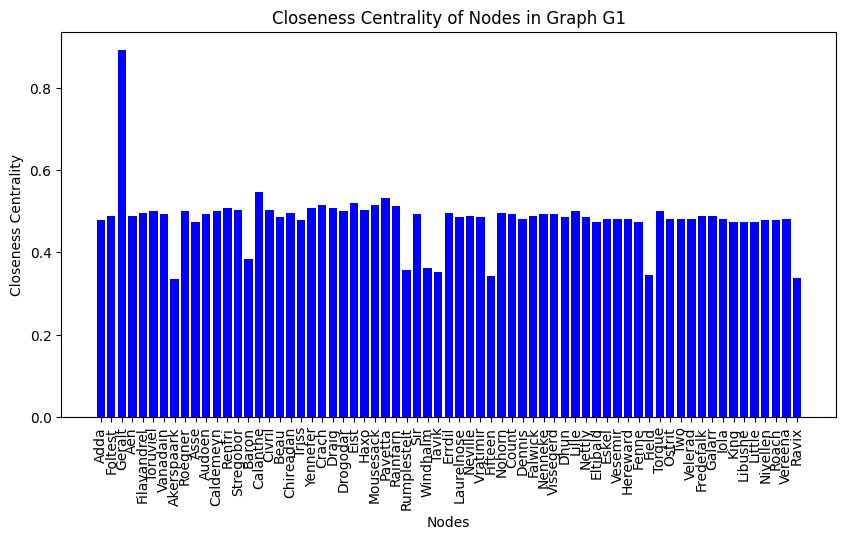

In [ ]:
# BOOK 1
closeness_nodes = closeness_1.keys()
closeness_centralities = closeness_1.values()

plt.figure(figsize=(10,5))
plt.bar(closeness_nodes, closeness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality of Nodes in Graph G1')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# # BOOK 2
# closeness_nodes = closeness_2.keys()
# closeness_centralities = closeness_2.values()

# plt.figure(figsize=(10,5))
# plt.bar(closeness_nodes, closeness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Closeness Centrality')
# plt.title('Closeness Centrality of Nodes in Graph G2')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 3
# closeness_nodes = closeness_3.keys()
# closeness_centralities = closeness_3.values()

# plt.figure(figsize=(10,5))
# plt.bar(closeness_nodes, closeness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Closeness Centrality')
# plt.title('Closeness Centrality of Nodes in Graph G3')
# plt.xticks(rotation=90)
# plt.show()

# BOOK 4
# closeness_nodes = closeness_4.keys()
# closeness_centralities = closeness_4.values()

# plt.figure(figsize=(13,5))
# plt.bar(closeness_nodes, closeness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Closeness Centrality')
# plt.title('Closeness Centrality of Nodes in Graph G4')
# plt.xticks(rotation=90)
# plt.show()

# BOOK 5
# closeness_nodes = closeness_5.keys()
# closeness_centralities = closeness_5.values()

# plt.figure(figsize=(10,5))
# plt.bar(closeness_nodes, closeness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Closeness Centrality')
# plt.title('Closeness Centrality of Nodes in Graph G5')
# plt.xticks(rotation=90)
# plt.show()

# BOOK 6
# closeness_nodes = closeness_6.keys()
# closeness_centralities = closeness_6.values()
# plt.figure(figsize=(13,5))
# plt.bar(closeness_nodes, closeness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Closeness Centrality')
# plt.title('Closeness Centrality of Nodes in Graph G6')
# plt.xticks(rotation=90)
# plt.show()

# BOOK 7
# closeness_nodes = closeness_7.keys()
# closeness_centralities = closeness_7.values()
# plt.figure(figsize=(15,5))
# plt.bar(closeness_nodes, closeness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Closeness Centrality')
# plt.title('Closeness Centrality of Nodes in Graph G7')
# plt.xticks(rotation=90)
# plt.show()

#### Closeness centrality ***distribution***

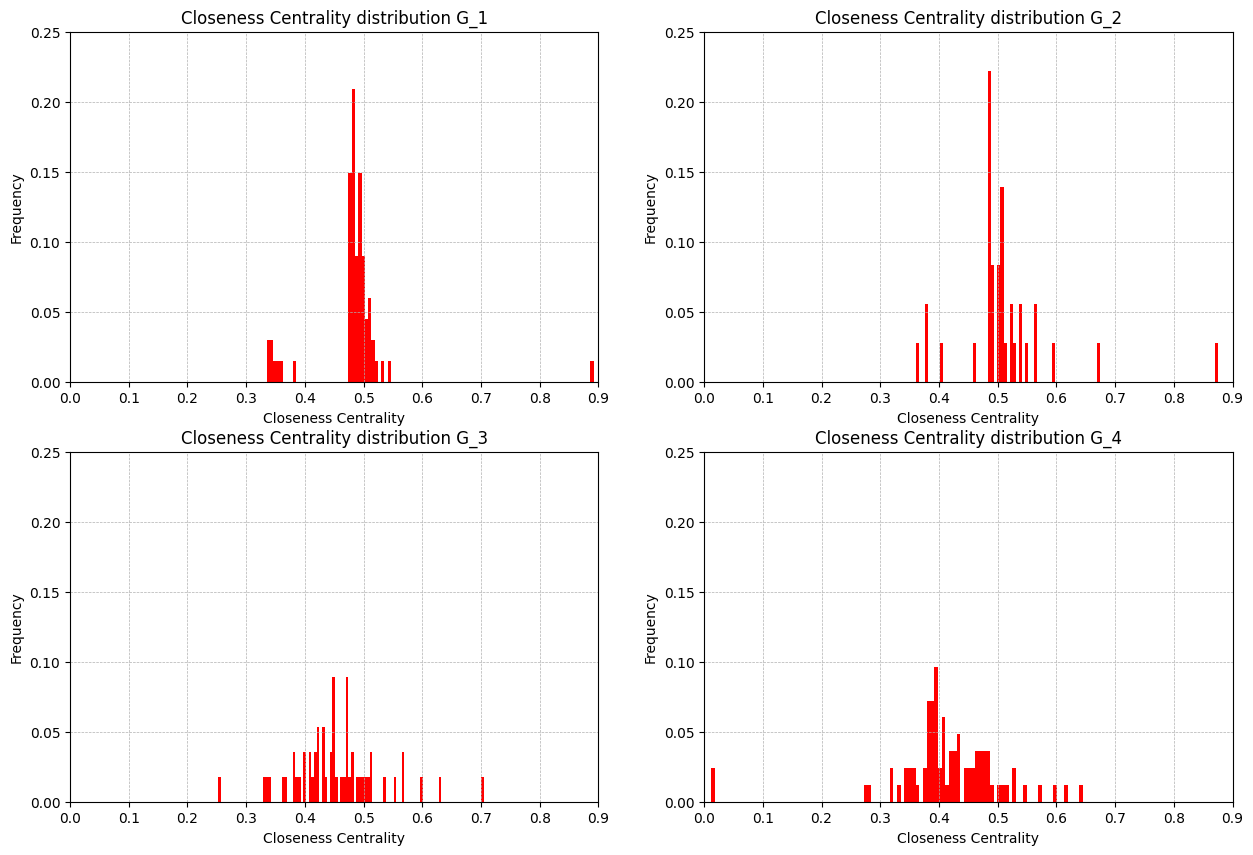

In [ ]:
# from BOOK1 TO BOOK 4

values_1 = list(closeness_1.values())
values_2 = list(closeness_2.values())
values_3 = list(closeness_3.values())
values_4 = list(closeness_4.values())

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.hist(values_1, bins=100, color = 'r', weights=np.ones(len(values_1)) / len(values_1))
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality distribution G_1')
plt.xlim(0, 0.9)
plt.ylim(0, 0.25)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(2, 2, 2)
plt.hist(values_2, bins=100, color = 'r', weights=np.ones(len(values_2)) / len(values_2))
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality distribution G_2')
plt.xlim(0, 0.9)
plt.ylim(0, 0.25)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(2, 2, 3)
plt.hist(values_3, bins=100, color = 'r', weights=np.ones(len(values_3)) / len(values_3))
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality distribution G_3')
plt.xlim(0, 0.9)
plt.ylim(0, 0.25)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(2, 2, 4)
plt.hist(values_4, bins=100, color = 'r', weights=np.ones(len(values_4)) / len(values_4))
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality distribution G_4')
plt.xlim(0, 0.9)
plt.ylim(0, 0.25)
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


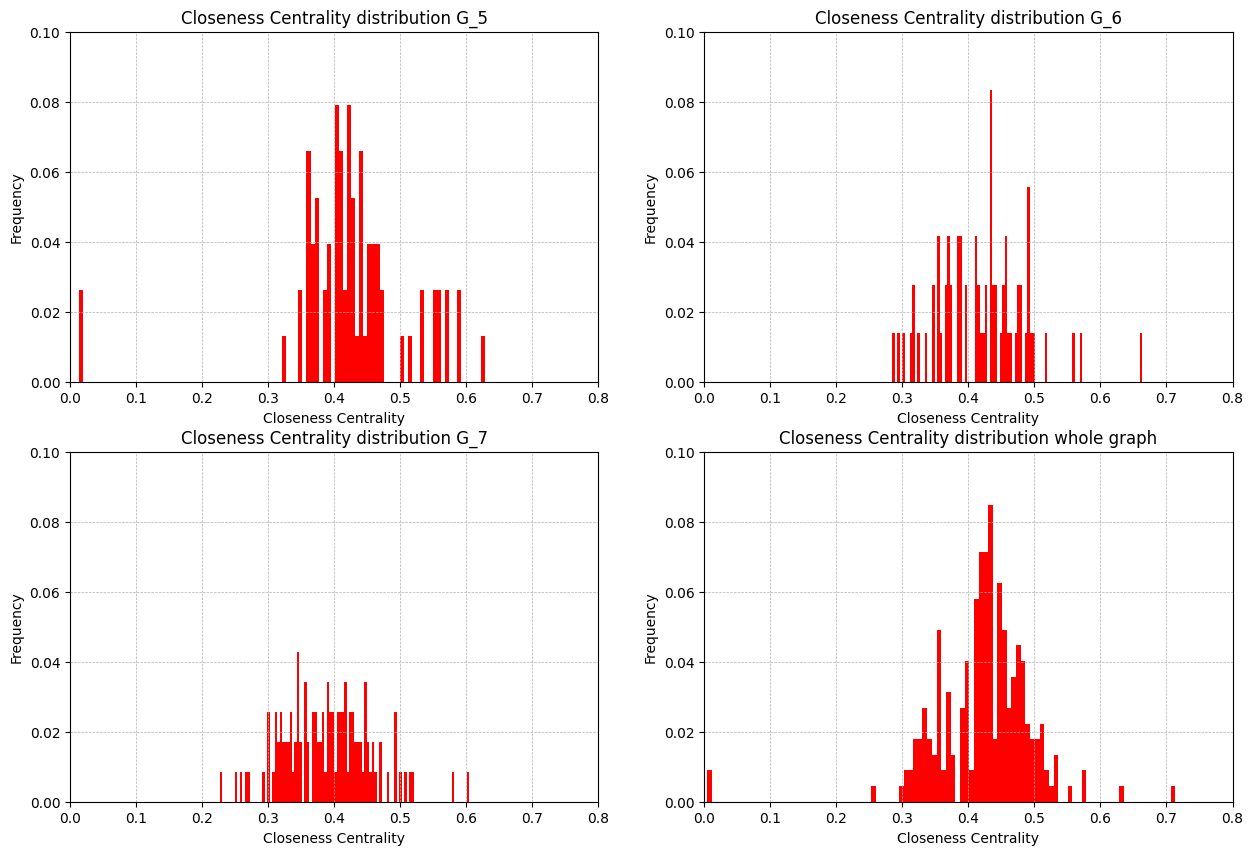

In [ ]:
# from BOOK5
values_5 = list(closeness_5.values())
values_6 = list(closeness_6.values())
values_7 = list(closeness_7.values())
values_all = list(closeness_all.values())


plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.hist(values_5, bins=100, color = 'r', weights=np.ones(len(values_5)) / len(values_5))
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality distribution G_5')
plt.xlim(0, 0.8)
plt.ylim(0, 0.10)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(2, 2, 2)
plt.hist(values_6, bins=100, color = 'r', weights=np.ones(len(values_6)) / len(values_6))
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality distribution G_6')
plt.xlim(0, 0.8)
plt.ylim(0, 0.10)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(2, 2, 3)
plt.hist(values_7, bins=100, color = 'r', weights=np.ones(len(values_7)) / len(values_7))
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality distribution G_7')
plt.xlim(0, 0.8)
plt.ylim(0, 0.10)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(2, 2, 4)
plt.hist(values_all, bins=100, color = 'r', weights=np.ones(len(values_all)) / len(values_all))
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality distribution whole graph')
plt.xlim(0, 0.8)
plt.ylim(0, 0.10)
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


### Cumulative Distribution for Closeness Centrality

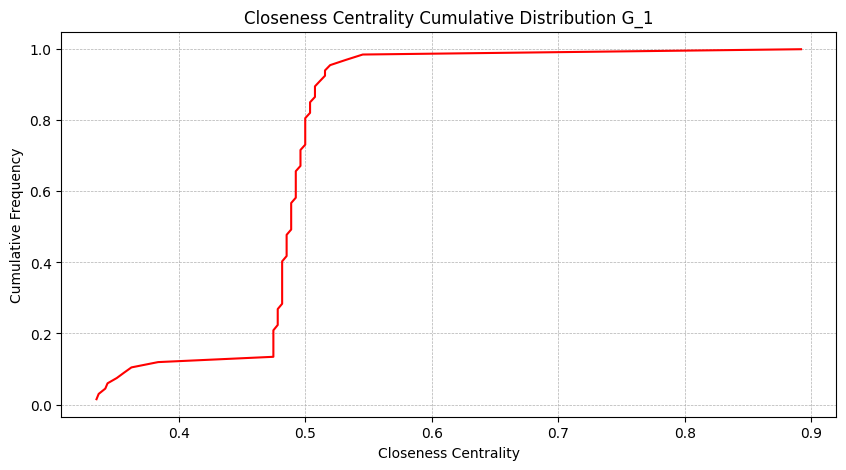

In [ ]:
#cumulative for BOOK 1

values_1 = list(closeness_1.values())
values_1.sort()
cumulative_frequencies_1 = np.cumsum(np.ones(len(values_1)) / len(values_1))


plt.figure(figsize=(10,5))

plt.plot(values_1, cumulative_frequencies_1, color = 'r')
plt.xlabel('Closeness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Closeness Centrality Cumulative Distribution G_1')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()

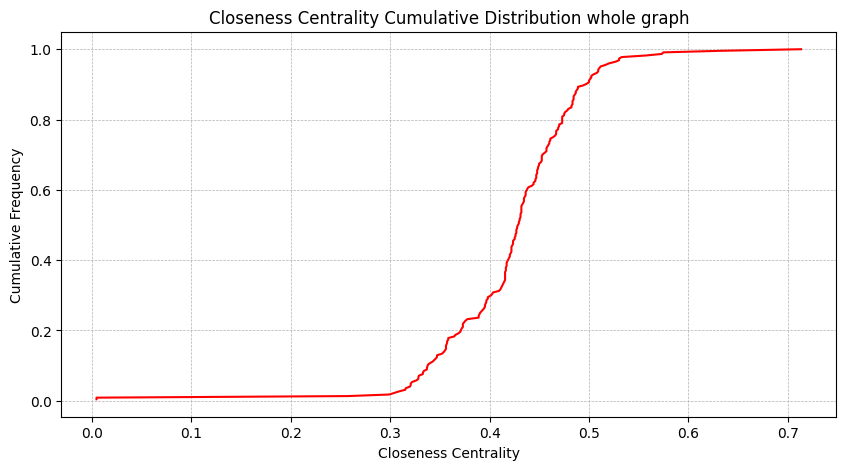

In [ ]:
#cumulative for all books

values_all = list(closeness_all.values())
values_all.sort()
cumulative_frequencies_all = np.cumsum(np.ones(len(values_all)) / len(values_all))


plt.figure(figsize=(10,5))

plt.plot(values_all, cumulative_frequencies_all, color = 'r')
plt.xlabel('Closeness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Closeness Centrality Cumulative Distribution whole graph')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()


## Local Clustering coefficient

In [ ]:
clustering_coefficient_1 = nx.clustering(G_1)
clustering_coefficient_2 = nx.clustering(G_2)
clustering_coefficient_3 = nx.clustering(G_3)
clustering_coefficient_4 = nx.clustering(G_4)
clustering_coefficient_5 = nx.clustering(G_5)
clustering_coefficient_6 = nx.clustering(G_6)
clustering_coefficient_7 = nx.clustering(G_7)
clustering_coefficient_all = nx.clustering(G_all)

# Print the clustering coefficient for each node
#for node, coeff in clustering_coefficient.items():
#    print(f"Node {node} has clustering coefficient {coeff}")

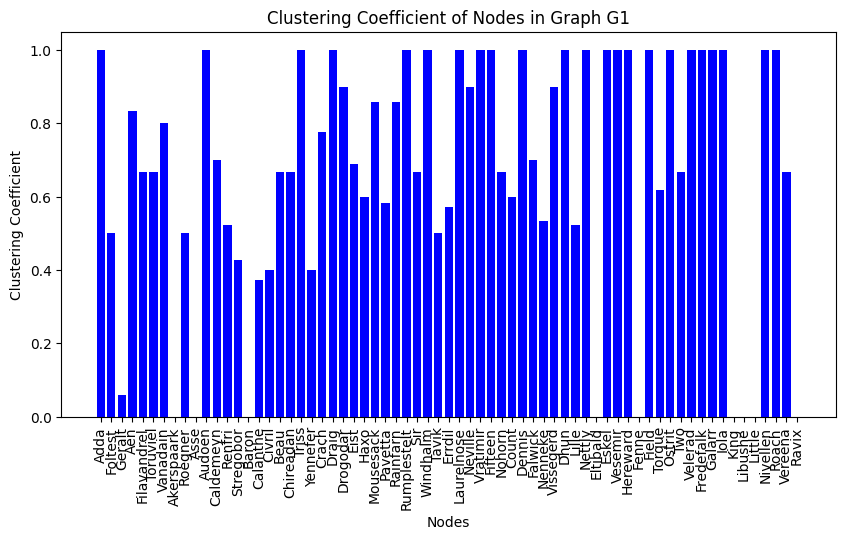

In [ ]:
# BOOK 1 -> DECOMMENTA DOPO
# Assuming 'betweenness' is your computed betweenness centrality dictionary
clustering_nodes = clustering_coefficient_1.keys()
clustering_values = clustering_coefficient_1.values()

plt.figure(figsize=(10,5))
plt.bar(clustering_nodes, clustering_values, color='b')
plt.xlabel('Nodes')
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficient of Nodes in Graph G1')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# # BOOK 2
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# clustering_nodes = clustering_coefficient_2.keys()
# clustering_values = clustering_coefficient_2.values()
# plt.figure(figsize=(10,5))
# plt.bar(clustering_nodes, clustering_values, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Clustering Coefficient')
# plt.title('Clustering Coefficient of Nodes in Graph G2')
# plt.xticks(rotation=90)
# plt.show()

# BOOK 3
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# clustering_nodes = clustering_coefficient_3.keys()
# clustering_values = clustering_coefficient_3.values()

# plt.figure(figsize=(10,5))
# plt.bar(clustering_nodes, clustering_values, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Clustering Coefficient')
# plt.title('Clustering Coefficient of Nodes in Graph G3')
# plt.xticks(rotation=90)
# plt.show()

# BOOK 4
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# clustering_nodes = clustering_coefficient_4.keys()
# clustering_values = clustering_coefficient_4.values()

# plt.figure(figsize=(13,5))
# plt.bar(clustering_nodes, clustering_values, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Clustering Coefficient')
# plt.title('Clustering Coefficient of Nodes in Graph G4')
# plt.xticks(rotation=90)
# plt.show()

# BOOK 5
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# clustering_nodes = clustering_coefficient_5.keys()
# clustering_values = clustering_coefficient_5.values()

# plt.figure(figsize=(13,5))
# plt.bar(clustering_nodes, clustering_values, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Clustering Coefficient')
# plt.title('Clustering Coefficient of Nodes in Graph G5')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 6
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# clustering_nodes = clustering_coefficient_6.keys()
# clustering_values = clustering_coefficient_6.values()
# plt.figure(figsize=(13,5))
# plt.bar(clustering_nodes, clustering_values, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Clustering Coefficient')
# plt.title('Clustering Coefficient of Nodes in Graph G6')
# plt.xticks(rotation=90)
# plt.show()

# BOOK 7
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# clustering_nodes = clustering_coefficient_7.keys()
# clustering_values = clustering_coefficient_7.values()
# plt.figure(figsize=(15,5))
# plt.bar(clustering_nodes, clustering_values, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Clustering Coefficient')
# plt.title('Clustering Coefficient of Nodes in Graph G7')
# plt.xticks(rotation=90)
# plt.show()

#### Correlation between Local Clustering Coefficient C_i and Degree Centrality d

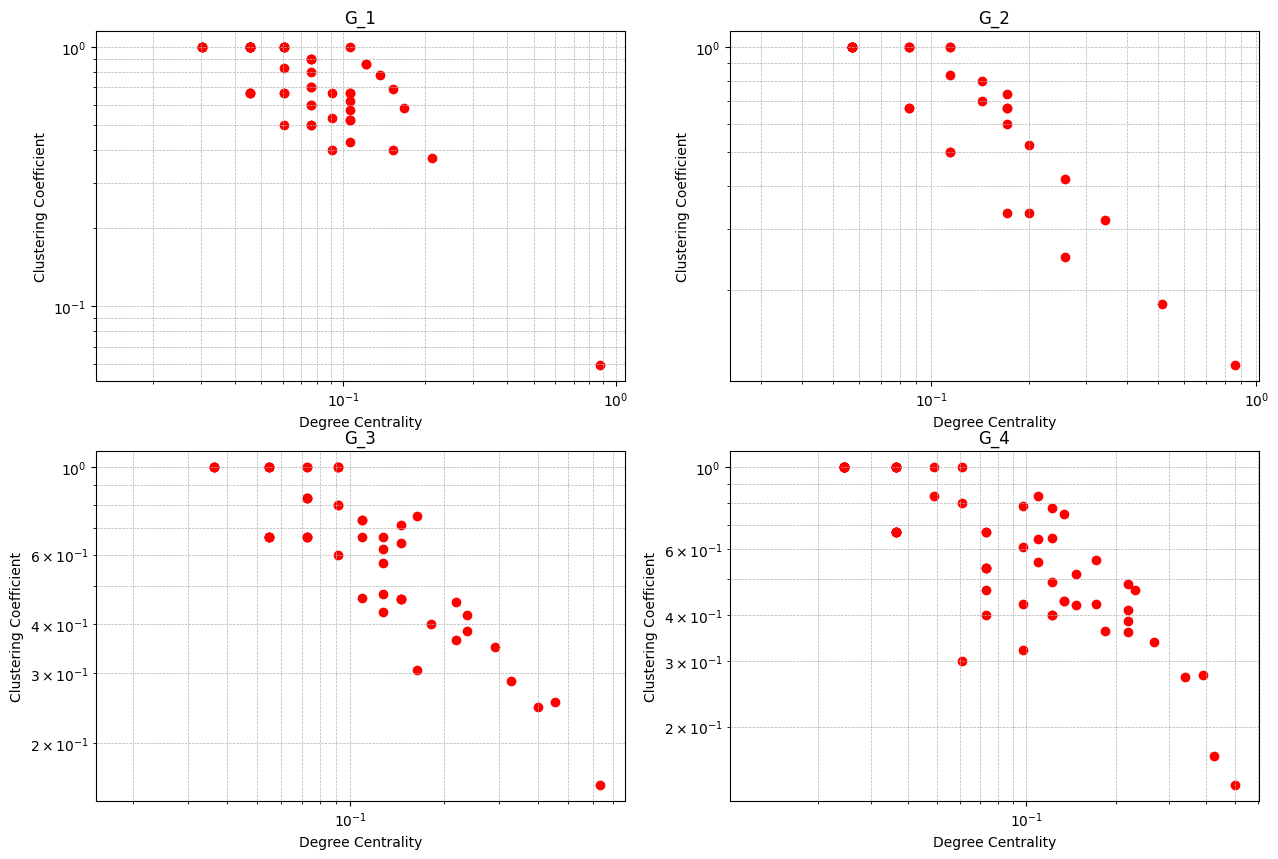

In [ ]:
# from BOOK1 TO BOOK 4

degree_values_1 = list(degree_1.values())
clustering_values_1 = list(clustering_coefficient_1.values())

degree_values_2 = list(degree_2.values())
clustering_values_2 = list(clustering_coefficient_2.values())

degree_values_3 = list(degree_3.values())
clustering_values_3 = list(clustering_coefficient_3.values())

degree_values_4 = list(degree_4.values())
clustering_values_4 = list(clustering_coefficient_4.values())

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.scatter(degree_values_1, clustering_values_1, color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Clustering Coefficient')
plt.title('G_1')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(2, 2, 2)
plt.scatter(degree_values_2, clustering_values_2, color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Clustering Coefficient')
plt.title('G_2')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(2, 2, 3)
plt.scatter(degree_values_3, clustering_values_3, color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Clustering Coefficient')
plt.title('G_3')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(2, 2, 4)
plt.scatter(degree_values_4, clustering_values_4, color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Clustering Coefficient')
plt.title('G_4')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()


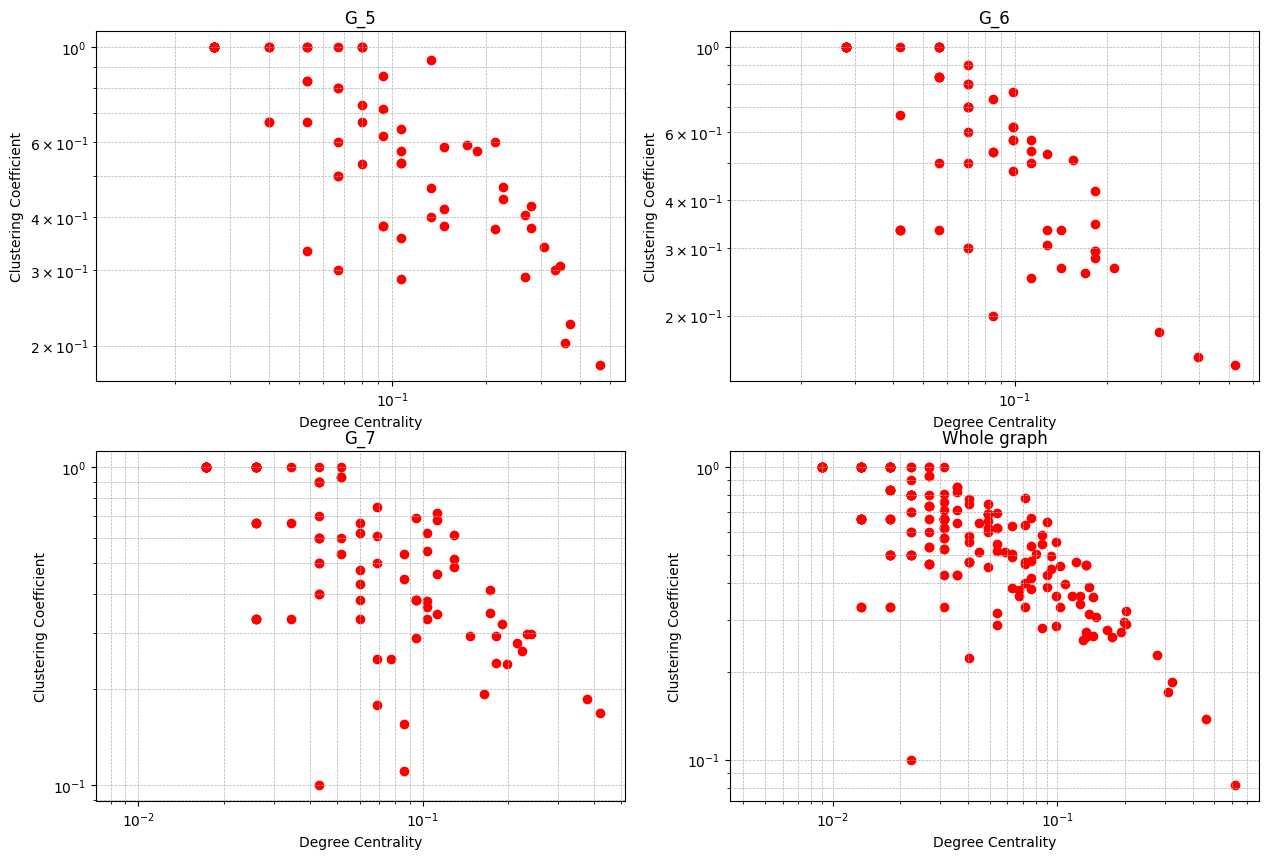

In [ ]:
# from BOOK 5

degree_values_5 = list(degree_5.values())
clustering_values_5 = list(clustering_coefficient_5.values())

degree_values_6 = list(degree_6.values())
clustering_values_6 = list(clustering_coefficient_6.values())

degree_values_7 = list(degree_7.values())
clustering_values_7 = list(clustering_coefficient_7.values())

degree_values_all = list(degree_all.values())
clustering_values_all = list(clustering_coefficient_all.values())

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.scatter(degree_values_5, clustering_values_5, color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Clustering Coefficient')
plt.title('G_5')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(2, 2, 2)
plt.scatter(degree_values_6, clustering_values_6, color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Clustering Coefficient')
plt.title('G_6')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(2, 2, 3)
plt.scatter(degree_values_7, clustering_values_7, color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Clustering Coefficient')
plt.title('G_7')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(2, 2, 4)
plt.scatter(degree_values_all, clustering_values_all, color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Clustering Coefficient')
plt.title('Whole graph')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


## Cliques

In [ ]:
# BOOK 1
cliques = list(nx.find_cliques(G_1))

# print only cliques larger than ...
for i, clique in enumerate(cliques):
  if len(clique) >= 7:
    clique1 = clique
    print(f"Clique {i+1}: {clique1}")


df_edge_clique_1 = df_edges1[df_edges1['Source'].isin(clique1) & df_edges1['Target'].isin(clique1)]
df_node_clique_1 = df_nodes1[df_nodes1['Nodes'].isin(clique1)]

Clique 23: ['Geralt', 'Calanthe', 'Pavetta', 'Mousesack', 'Draig', 'Rainfarn', 'Eist', 'Crach']


In [ ]:
# BOOK 2
cliques = list(nx.find_cliques(G_2))

for i, clique in enumerate(cliques):
  if len(clique) >= 5:
    clique2 = clique
    print(f"Clique {i+1}: {clique2}")


df_edge_clique_2 = df_edges2[df_edges2['Source'].isin(clique2) & df_edges2['Target'].isin(clique2)]
df_node_clique_2 = df_nodes2[df_nodes2['Nodes'].isin(clique2)]

Clique 20: ['Geralt', 'Dandelion', 'Agloval', 'Duke', 'Zelest']
Clique 21: ['Geralt', 'Dandelion', 'Agloval', 'Little', 'Essi']
Clique 27: ['Geralt', 'Freixenet', 'Ciri', 'Eithné', 'Braenn']


In [ ]:
# BOOK 3
cliques = list(nx.find_cliques(G_3))

for i, clique in enumerate(cliques):
  if len(clique) >= 7:
    clique3 = clique
    print(f"Clique {i+1}: {clique3}")


df_edge_clique_3 = df_edges3[df_edges3['Source'].isin(clique3) & df_edges3['Target'].isin(clique3)]
df_node_clique_3 = df_nodes3[df_nodes3['Nodes'].isin(clique3)]

Clique 28: ['Ciri', 'Geralt', 'Yennefer', 'Rience', 'Dandelion', 'Philippa', 'Shani']


In [ ]:
# BOOK 4
cliques = list(nx.find_cliques(G_4))

for i, clique in enumerate(cliques):
  if len(clique) >= 7:
    clique4 = clique
    print(f"Clique {i+1}: {clique4}")

df_edge_clique_4 = df_edges4[df_edges4['Source'].isin(clique4) & df_edges4['Target'].isin(clique4)]
df_node_clique_4 = df_nodes4[df_nodes4['Nodes'].isin(clique4)]

Clique 7: ['Sabrina', 'Philippa', 'Geralt', 'Yennefer', 'Tissaia', 'Triss', 'Keira']
Clique 8: ['Sabrina', 'Philippa', 'Geralt', 'Yennefer', 'Tissaia', 'Triss', 'Lydia']
Clique 9: ['Sabrina', 'Philippa', 'Geralt', 'Yennefer', 'Tissaia', 'Emhyr', 'Francesca']
Clique 76: ['Ciri', 'Yennefer', 'Geralt', 'Vilgefortz', 'Tissaia', 'Triss', 'Gar']
Clique 77: ['Ciri', 'Yennefer', 'Geralt', 'Vilgefortz', 'Tissaia', 'Triss', 'Lydia']
Clique 79: ['Ciri', 'Yennefer', 'Geralt', 'Vilgefortz', 'Dandelion', 'Gar', 'Triss']
Clique 80: ['Ciri', 'Yennefer', 'Geralt', 'Vilgefortz', 'Dandelion', 'Codringher', 'Emhyr']
Clique 103: ['Keira', 'Geralt', 'Yennefer', 'Tissaia', 'Vilgefortz', 'Gar', 'Triss']
Clique 105: ['Keira', 'Geralt', 'Yennefer', 'Tissaia', 'Philippa', 'Gar', 'Triss']
Clique 106: ['Artaud', 'Geralt', 'Yennefer', 'Tissaia', 'Vilgefortz', 'Emhyr', 'Francesca']
Clique 108: ['Artaud', 'Geralt', 'Yennefer', 'Tissaia', 'Philippa', 'Emhyr', 'Francesca']


In [ ]:
# BOOK 5
cliques = list(nx.find_cliques(G_5))

for i, clique in enumerate(cliques):
  if len(clique) >= 8:
    clique5 = clique
    print(f"Clique {i+1}: {clique5}")

df_edge_clique_5 = df_edges5[df_edges5['Source'].isin(clique5) & df_edges5['Target'].isin(clique5)]
df_node_clique_5 = df_nodes5[df_nodes5['Nodes'].isin(clique5)]

Clique 7: ['Sabrina', 'Fringilla', 'Philippa', 'Yennefer', 'Assire', 'Keira', 'Ciri', 'Ida']
Clique 8: ['Sabrina', 'Fringilla', 'Philippa', 'Yennefer', 'Assire', 'Keira', 'Ciri', 'Emhyr']
Clique 9: ['Sabrina', 'Fringilla', 'Philippa', 'Yennefer', 'Assire', 'Keira', 'Triss', 'Ida']
Clique 10: ['Sabrina', 'Fringilla', 'Philippa', 'Yennefer', 'Assire', 'Keira', 'Triss', 'Emhyr']
Clique 14: ['Sabrina', 'Francesca', 'Yennefer', 'Assire', 'Philippa', 'Ciri', 'Ida', 'Margarita']
Clique 15: ['Sabrina', 'Francesca', 'Yennefer', 'Assire', 'Philippa', 'Ciri', 'Ida', 'Keira']
Clique 17: ['Sabrina', 'Francesca', 'Yennefer', 'Assire', 'Philippa', 'Ciri', 'Emhyr', 'Margarita']
Clique 18: ['Sabrina', 'Francesca', 'Yennefer', 'Assire', 'Philippa', 'Ciri', 'Emhyr', 'Keira']
Clique 19: ['Sabrina', 'Francesca', 'Yennefer', 'Assire', 'Philippa', 'Triss', 'Keira', 'Ida']
Clique 20: ['Sabrina', 'Francesca', 'Yennefer', 'Assire', 'Philippa', 'Triss', 'Keira', 'Emhyr']


In [ ]:
# BOOK 6
cliques = list(nx.find_cliques(G_6))
# Print all cliques
for i, clique in enumerate(cliques):
  if len(clique) >= 6:
    clique6 = clique
    print(f"Clique {i+1}: {clique}")


df_edge_clique_6 = df_edges6[df_edges6['Source'].isin(clique6) & df_edges6['Target'].isin(clique6)]
df_node_clique_6 = df_nodes6[df_nodes6['Nodes'].isin(clique6)]

Clique 20: ['Ciri', 'Sigrdrifa', 'Vilgefortz', 'Philippa', 'Yennefer', 'Crach']
Clique 28: ['Ciri', 'Geralt', 'Cahir', 'Milva', 'Dandelion', 'Beau']
Clique 31: ['Ciri', 'Geralt', 'Crach', 'Yennefer', 'Vilgefortz', 'Triss']


In [ ]:
# BOOK 7
cliques = list(nx.find_cliques(G_7))

for i, clique in enumerate(cliques):
  if len(clique) >= 8:
    clique7 = clique

    print(f"Clique {i+1}: {clique7}")

df_edge_clique_7 = df_edges7[df_edges7['Source'].isin(clique7) & df_edges7['Target'].isin(clique7)]
df_node_clique_7 = df_nodes7[df_nodes7['Nodes'].isin(clique7)]

Clique 54: ['Ciri', 'Geralt', 'Yennefer', 'Triss', 'Dandelion', 'Milva', 'Cahir', 'Fringilla']
Clique 55: ['Ciri', 'Geralt', 'Yennefer', 'Triss', 'Dandelion', 'Milva', 'Cahir', 'Zoltan']


In [ ]:
!mkdir gephi_cliques

df_edge_clique_1.to_csv('gephi_cliques/edge_clique_1.csv', index=False)
df_node_clique_1.to_csv('gephi_cliques/node_clique_1.csv', index=False)
df_edge_clique_2.to_csv('gephi_cliques/edge_clique_2.csv', index=False)
df_node_clique_2.to_csv('gephi_cliques/node_clique_2.csv', index=False)
df_edge_clique_3.to_csv('gephi_cliques/edge_clique_3.csv', index=False)
df_node_clique_3.to_csv('gephi_cliques/node_clique_3.csv', index=False)
df_edge_clique_4.to_csv('gephi_cliques/edge_clique_4.csv', index=False)
df_node_clique_4.to_csv('gephi_cliques/node_clique_4.csv', index=False)
df_edge_clique_5.to_csv('gephi_cliques/edge_clique_5.csv', index=False)
df_node_clique_5.to_csv('gephi_cliques/node_clique_5.csv', index=False)
df_edge_clique_6.to_csv('gephi_cliques/edge_clique_6.csv', index=False)
df_node_clique_6.to_csv('gephi_cliques/node_clique_6.csv', index=False)
df_edge_clique_7.to_csv('gephi_cliques/edge_clique_7.csv', index=False)
df_node_clique_7.to_csv('gephi_cliques/node_clique_7.csv', index=False)

In [ ]:
!zip -r /content/gephi_cliques.zip /content/gephi_cliques

from google.colab import files
files.download("/content/gephi_cliques.zip")

  adding: content/gephi_cliques/ (stored 0%)
  adding: content/gephi_cliques/edge_clique_6.csv (deflated 56%)
  adding: content/gephi_cliques/edge_clique_2.csv (deflated 48%)
  adding: content/gephi_cliques/node_clique_7.csv (deflated 3%)
  adding: content/gephi_cliques/edge_clique_5.csv (deflated 66%)
  adding: content/gephi_cliques/edge_clique_7.csv (deflated 66%)
  adding: content/gephi_cliques/edge_clique_4.csv (deflated 65%)
  adding: content/gephi_cliques/node_clique_4.csv (stored 0%)
  adding: content/gephi_cliques/node_clique_1.csv (deflated 5%)
  adding: content/gephi_cliques/edge_clique_1.csv (deflated 66%)
  adding: content/gephi_cliques/node_clique_6.csv (stored 0%)
  adding: content/gephi_cliques/node_clique_2.csv (stored 0%)
  adding: content/gephi_cliques/edge_clique_3.csv (deflated 62%)
  adding: content/gephi_cliques/node_clique_5.csv (deflated 3%)
  adding: content/gephi_cliques/node_clique_3.csv (deflated 2%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## K core and core periphery structures

In [ ]:
# Compute the k-core of the graph

k = [4, 5, 6,7,8,9]

for i in k:

  k_core_1 = nx.k_core(G_1, i)
  k_core_2 = nx.k_core(G_2, i)
  k_core_3 = nx.k_core(G_3, i)
  k_core_4 = nx.k_core(G_4, i)
  k_core_5 = nx.k_core(G_5, i)
  k_core_6 = nx.k_core(G_6, i)
  k_core_7 = nx.k_core(G_7, i)

  # Print the nodes in the k-core
  print(f"The nodes in the {i}-core in Book 1 are: {k_core_1.nodes()}")
  print(f"The nodes in the {i}-core in Book 2 are: {k_core_2.nodes()}")
  print(f"The nodes in the {i}-core in Book 3 are: {k_core_3.nodes()}")
  print(f"The nodes in the {i}-core in Book 4 are: {k_core_4.nodes()}")
  print(f"The nodes in the {i}-core in Book 5 are: {k_core_5.nodes()}")
  print(f"The nodes in the {i}-core in Book 6 are: {k_core_6.nodes()}")
  print(f"The nodes in the {i}-core in Book 7 are: {k_core_7.nodes()}")



The nodes in the 4-core in Book 1 are: ['Aen', 'Filavandrel', 'Caldemeyn', 'Crach', 'Vratimir', 'Eist', 'Renfri', 'Audoen', 'Geralt', 'Laurelnose', 'Pavetta', 'Toruviel', 'Torque', 'Calanthe', 'Draig', 'Vissegerd', 'Vanadain', 'Windhalm', 'Mousesack', 'Rainfarn', 'Drogodar', 'Galarr', 'Haxo', 'Neville', 'Stregobor', 'Yennefer', 'Errdil', 'Lille', 'Chireadan']
The nodes in the 4-core in Book 2 are: ['Sir', 'Little', 'Geralt', 'Sword', 'Dandelion', 'Duke', 'Ciri', 'Yennefer', 'Braenn', 'Freixenet', 'Yurga', 'Eithné', 'Mousesack', 'Agloval', 'Essi', 'Calanthe', 'Zelest']
The nodes in the 4-core in Book 3 are: ['Ciri', 'Yarpen', 'Tissaia', 'Vilgefortz', 'Yennefer', 'Artaud', 'Lydia', 'Two', 'Dandelion', 'Geralt', 'Beau', 'Iola', 'Nenneke', 'Calanthe', 'Crach', 'Emhyr', 'Foltest', 'King', 'Meve', 'Pavetta', 'Rience', 'Vissegerd', 'Eskel', 'Everett', 'Forest', 'Henselt', 'Ithlinne', 'Jarre', 'Lambert', 'Ori', 'Paulie', 'Philippa', 'Shani', 'Sword', 'Triss', 'Vanielle', 'Vesemir']
The nodes i

**BOOK1**
The nodes in the 7-core in Book 1 are: ['Draig', 'Geralt', 'Eist', 'Mousesack', 'Rainfarn', 'Crach', 'Calanthe', 'Pavetta']

**BOOK2**
The nodes in the 4-core in Book 2 are: ['Ciri', 'Freixenet', 'Yurga', 'Geralt', 'Agloval', 'Essi', 'Little', 'Mousesack', 'Zelest', 'Dandelion', 'Braenn', 'Eithné', 'Sword', 'Calanthe', 'Yennefer', 'Sir', 'Duke']


**BOOK3**
The nodes in the 6-core in Book 3 are: ['Ciri', 'Philippa', 'Geralt', 'Rience', 'Dandelion', 'Yennefer', 'Calanthe', 'King', 'Shani']

**BOOK4**
The nodes in the 8-core in Book 4 are: ['Henselt', 'Philippa', 'Sabrina', 'Emhyr', 'Codringher', 'Foltest', 'Keira', 'Ciri', 'Gar', 'Triss', 'Marti', 'King', 'Artaud', 'Geralt', 'Francesca', 'Vilgefortz', 'Tissaia', 'Rience', 'Lydia', 'Dandelion', 'Demavend', 'Yennefer']

**BOOK5**
The nodes in the 9-core in Book 5 are: ['Ciri', 'Ida', 'Philippa', 'Keira', 'Triss', 'Sabrina', 'Fringilla', 'Francesca', 'Emhyr', 'Yennefer', 'Assire']

**BOOK6**
The nodes in the 5-core in Book 6 are: ['Asse', 'Philippa', 'Emhyr', 'Crach', 'Calanthe', 'Baron', 'Pavetta', 'Ciri', 'Triss', 'Meve', 'Two', 'Mistle', 'King', 'Sigrdrifa', 'Vysogota', 'Vissegerd', 'Geralt', 'Beau', 'Vilgefortz', 'Hjalmar', 'Rience', 'Cahir', 'Dandelion', 'Milva', 'Julia', 'Zuleyka', 'Falka', 'Yennefer']


**BOOK7**
The nodes in the 8-core in Book 7 are: ['Philippa', 'Sabrina', 'Fringilla', 'Emhyr', 'Ciri', 'Triss', 'Zoltan', 'Count', 'King', 'Margarita', 'Geralt', 'Francesca', 'Beau', 'Vilgefortz', 'Cahir', 'Dandelion', 'Milva', 'Yennefer', 'Assire']



## Structural equivalence

Structural equivalence is a count of the number of common neighbours two nodes have

In [ ]:
#import sys
#np.set_printoptions(threshold=sys.maxsize) # to print the whole matrix without truncation

# Compute adjacency matrix
A_1 = nx.adjacency_matrix(G_1)
A_2 = nx.adjacency_matrix(G_2)
A_3 = nx.adjacency_matrix(G_3)
A_4 = nx.adjacency_matrix(G_4)
A_5 = nx.adjacency_matrix(G_5)
A_6 = nx.adjacency_matrix(G_6)
A_7 = nx.adjacency_matrix(G_7)


def structural_equiv(A):
  return np.inner(A.toarray(), A.toarray()) / (np.linalg.norm(A.toarray(), axis=1) * np.linalg.norm(A.toarray(), axis=1)[:, None])

# Compute structural equivalence (cosine similarity of adjacency matrix rows)
structural_equivalence_1 = structural_equiv(A_1)
structural_equivalence_2 = structural_equiv(A_2)
structural_equivalence_3 = structural_equiv(A_3)
structural_equivalence_4 = structural_equiv(A_4)
structural_equivalence_5 = structural_equiv(A_5)
structural_equivalence_6 = structural_equiv(A_6)
structural_equivalence_7 = structural_equiv(A_7)


print(structural_equivalence_7)
# put a threshold on values to select only couples of nodes with a consistent number of common neighbours

[[1.         0.2        0.63245553 ... 0.         0.         0.        ]
 [0.2        1.         0.15811388 ... 0.         0.         0.        ]
 [0.63245553 0.15811388 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [ ]:
# Set a threshold for structural equivalence
threshold = 0.9

# Get the indices of elements in structural_equivalence_1 that are greater than the threshold
indices = np.where(structural_equivalence_7 > threshold)

# Zip the indices together to get pairs of structurally equivalent nodes
pairs = list(zip(indices[0], indices[1]))

# Since the matrix is symmetric, we'll get each pair twice (e.g., (1, 2) and (2, 1)).
# We can use a set to get the unique pairs:
unique_pairs = set(tuple(sorted(pair)) for pair in pairs)

# Print the structurally equivalent pairs
for pair in unique_pairs:
    if pair[0] != pair[1]:
        node_1 = df_nodes7.iloc[pair[0]]
        node_2 = df_nodes7.iloc[pair[1]]
        print(f"Nodes {node_1.Nodes} ({pair[0]}) and {node_2.Nodes} ({pair[1]}) are structurally equivalent.")

Nodes Everett (93) and Ithlinne (109) are structurally equivalent.
Nodes Kobus (76) and Morvran (77) are structurally equivalent.


## Assortative mixing by degree

In [ ]:
# it's only a value. Put it and do comments

# A positive value indicates a correlation between nodes of similar degree (high with high, low with low)
# while a negative value indicates a correlation between nodes of different degree
r_1 = nx.degree_assortativity_coefficient(G_1)

print("Degree assortativity coefficient:", r_1)
# Negative result -> high degree nodes interact more with low degree nodes
# a star-like graph (see picture on the slide)

Degree assortativity coefficient: -0.2505522119404024


In [ ]:
r_1 = nx.degree_assortativity_coefficient(G_1)
r_2 = nx.degree_assortativity_coefficient(G_2)
r_3 = nx.degree_assortativity_coefficient(G_3)
r_4 = nx.degree_assortativity_coefficient(G_4)
r_5 = nx.degree_assortativity_coefficient(G_5)
r_6 = nx.degree_assortativity_coefficient(G_6)
r_7 = nx.degree_assortativity_coefficient(G_7)

print("Degree assortativity coefficient book 1:", r_1)
print("Degree assortativity coefficient book 2:", r_2)
print("Degree assortativity coefficient book 3:", r_3)
print("Degree assortativity coefficient book 4:", r_4)
print("Degree assortativity coefficient book 5:", r_5)
print("Degree assortativity coefficient book 6:", r_6)
print("Degree assortativity coefficient book 7:", r_7)

Degree assortativity coefficient book 1: -0.2505522119404024
Degree assortativity coefficient book 2: -0.3918270416897044
Degree assortativity coefficient book 3: -0.2367110202879257
Degree assortativity coefficient book 4: -0.25321777572121285
Degree assortativity coefficient book 5: -0.24594744728989135
Degree assortativity coefficient book 6: -0.1854984742624426
Degree assortativity coefficient book 7: -0.14474127323748


**do a tabella and commenta**

## Density

In [ ]:
density_1 = nx.density(G_1)
density_2 = nx.density(G_2)
density_3 = nx.density(G_3)
density_4 = nx.density(G_4)
density_5 = nx.density(G_5)
density_6 = nx.density(G_6)
density_7 = nx.density(G_7)

print(density_1)
print(density_2)
print(density_3)
print(density_4)
print(density_5)
print(density_6)
print(density_7)

0.08005427408412483
0.1492063492063492
0.12727272727272726
0.08962679988245666
0.11017543859649123
0.09076682316118936
0.06660772178013558
